<a href="https://colab.research.google.com/github/vn322/Wrestling/blob/main/DRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib
#import matplotlib.pyplot as plt


```
1032213202,  4,  6,  16,   5
```


# download

In [2]:
df_act= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 0)
df_act.head(3)

fighter1   fighter2          stage  start_ep    end_ep  attacker  \
0  ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:47:00  04:48:00         1   
1  ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:31:00  04:30:00         2   
2  ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:28:00  04:26:00         2   

  actions_1            actions_2 results_1 results_2  
0     –∞–ª–Ω–±–∫                –∞–ª—Ä–ø–≥         1         0  
1        –±–ª                –∞–ø—Ä–ø–∫         0         0  
2     –∞–ø—Ä–±–≥  –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥         1     1,0,0

In [3]:
df_par= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 1)
df_par.head(3)

id               name      nation  place  weight_over_73  birthdate
0  gusil0194     GUSEYNOV IIgar      Russia      1               0 1994-01-21
1  makda0401   MAKAGONOV Daniel      Russia      2               0 2001-04-03
2  khias0501  KHIKMATOV Asadbek  Uzbekistan      3               0 2001-05-16

In [4]:
df_par = df_par.drop('name', axis=1)

In [5]:
df_spr= pd.read_excel('https://github.com/vn322/Sport-University/raw/refs/heads/main/combat/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%9A%D0%BE%D0%BA%D0%B8%D0%BD,%20%D0%A1%D0%B2%D0%B5%D1%80%D1%87%D0%BA%D0%BE%D0%B2,%20%D0%A5%D0%B0%D1%87%D0%B0%D1%82%D1%80%D1%8F%D0%BD.xlsx', sheet_name= 2)
df_spr.head(3)

action abbreviation                                      description
0  –∞—Ç–∞–∫–∞        –∞–ª—Ä–ø–≥   –∞—Ç–∞–∫–∞ –ª–µ–≤–æ–π —Ä—É–∫–æ–π –ø—Ä—è–º–æ–π —É–¥–∞—Ä –≤ –æ–±–ª–∞—Å—Ç—å –≥–æ–ª–æ–≤—ã
1  –∞—Ç–∞–∫–∞        –∞–ø—Ä–ø–≥  –∞—Ç–∞–∫–∞ –ø—Ä–∞–≤–æ–π —Ä—É–∫–æ–π –ø—Ä—è–º–æ–π —É–¥–∞—Ä –≤ –æ–±–ª–∞—Å—Ç—å –≥–æ–ª–æ–≤—ã
2  –∞—Ç–∞–∫–∞        –∞–ª–Ω–±–∫        –∞—Ç–∞–∫–∞ –ª–µ–≤–æ–π –Ω–æ–≥–æ–π –±–æ–∫–æ–≤–æ–π —É–¥–∞—Ä –≤ —Ç—É–ª–æ–≤–∏—â–µ

# NLP

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
df_act.head(3)

fighter1   fighter2          stage  start_ep    end_ep  attacker  \
0  ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:47:00  04:48:00         1   
1  ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:31:00  04:30:00         2   
2  ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:28:00  04:26:00         2   

  actions_1            actions_2 results_1 results_2  
0     –∞–ª–Ω–±–∫                –∞–ª—Ä–ø–≥         1         0  
1        –±–ª                –∞–ø—Ä–ø–∫         0         0  
2     –∞–ø—Ä–±–≥  –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥         1     1,0,0

In [25]:
#df_word = df_act[['actions_1', 'actions_2']]
df_word = df_act['actions_1'] + '. '+ df_act['actions_2']
df_word.head(2)

0    –∞–ª–Ω–±–∫. –∞–ª—Ä–ø–≥
1       –±–ª. –∞–ø—Ä–ø–∫
dtype: object

In [170]:
df_word = df_word.to_frame()

In [171]:
type(df_word)

pandas.core.frame.DataFrame

In [172]:
df_word.columns

RangeIndex(start=0, stop=1, step=1)

–°–∞–º—ã–π –ø—Ä–æ—Å—Ç–æ–π —Å–ø–æ—Å–æ–± –∏–∑–≤–ª–µ—á—å —Ñ–∏—á–∏ –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö -- –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä—ã: `CountVectorizer` –∏ `TfidfVectorizer`

–û–±—ä–µ–∫—Ç `CountVectorizer` –¥–µ–ª–∞–µ—Ç –ø—Ä–æ—Å—Ç—É—é –≤–µ—â—å:
* —Å—Ç—Ä–æ–∏—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞ (–∫–∞–∂–¥–æ–π –ø—Ä–∏—à–µ–¥—à–µ–π –µ–º—É —Å—Ç—Ä–æ–∫–∏) –≤–µ–∫—Ç–æ—Ä —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ `n`, –≥–¥–µ `n` -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –∏–ª–∏ n-–≥—Ä–∞–º –≤–æ –≤—Å—ë–º –∫–æ—Ä–ø—É—Å–µ
* –∑–∞–ø–æ–ª–Ω—è–µ—Ç –∫–∞–∂–¥—ã–π i-—Ç—ã–π —ç–ª–µ–º–µ–Ω—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –≤—Ö–æ–∂–¥–µ–Ω–∏–π —Å–ª–æ–≤–∞ –≤ –¥–∞–Ω–Ω—ã–π –¥–æ–∫—É–º–µ–Ω—Ç

In [161]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(df_word) # bow -- bag of words (–º–µ—à–æ–∫ —Å–ª–æ–≤)

In [162]:
sac = list(vec.vocabulary_.items())
sac = sorted(sac, key=lambda item: item[1], reverse=True)
sac

[('—É—Ö—É–¥', 50),
 ('—É–∫–ª', 49),
 ('–ø–ø—É–¥–ø—Ä', 48),
 ('–ø–ø—É–¥–ø', 47),
 ('–ø–ø—É–¥', 46),
 ('–ø–ø–±–ø', 45),
 ('–ø–ø–±–ª–ø—Ä', 44),
 ('–ø–ø–±', 43),
 ('–ø–±', 42),
 ('–æ—Å–∫', 41),
 ('–æ–∫—Ç', 40),
 ('–Ω—ã—Ä', 39),
 ('–Ω–∫–¥', 38),
 ('–Ω–∫', 37),
 ('–∫–∞–±—Ä', 36),
 ('–∫–∞–±', 35),
 ('–∑–æ—Ç', 34),
 ('–∑–æ–Ω', 33),
 ('–±–ª', 32),
 ('–∞–ø—Ä—Å–≥', 31),
 ('–∞–ø—Ä—Ä–≥', 30),
 ('–∞–ø—Ä–ø–∫', 29),
 ('–∞–ø—Ä–ø–≥', 28),
 ('–∞–ø—Ä–≥', 27),
 ('–∞–ø—Ä–≤–∫', 26),
 ('–∞–ø—Ä–±–∫', 25),
 ('–∞–ø—Ä–±–≥', 24),
 ('–∞–ø–ø–≥', 23),
 ('–∞–ø–Ω—Ä–∫', 22),
 ('–∞–ø–Ω—Ä–≥', 21),
 ('–∞–ø–Ω—Ä', 20),
 ('–∞–ø–Ω–ø–∫', 19),
 ('–∞–ø–Ω–ø–≥', 18),
 ('–∞–ø–Ω–ª–∫', 17),
 ('–∞–ø–Ω–±–∫', 16),
 ('–∞–ø–Ω–±–≥', 15),
 ('–∞–ª—Ä—Å–≥', 14),
 ('–∞–ª—Ä–ø–∫', 13),
 ('–∞–ª—Ä–ø–≥', 12),
 ('–∞–ª—Ä–±–∫', 11),
 ('–∞–ª—Ä–±–≥', 10),
 ('–∞–ª–ø–∫', 9),
 ('–∞–ª–Ω—Ä', 8),
 ('–∞–ª–Ω–ø–∫', 7),
 ('–∞–ª–Ω–ø–≥', 6),
 ('–∞–ª–Ω–ª–∫', 5),
 ('–∞–ª–Ω–¥–∫', 4),
 ('–∞–ª–Ω–≤–∫', 3),
 ('–∞–ª–Ω–±–∫', 2),
 ('–∞–ª–Ω–±–≥', 1),
 ('–∞–ª–≤–ø–≥', 0)]

`ngram_range` –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ —Ç–æ, –∫–∞–∫–∏–µ n-–≥—Ä–∞–º–º—ã –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ–∏—á–µ–π:<br/>
* ngram_range=(1, 1) -- —É–Ω–∏–≥—Ä–∞–º–º—ã<br/>
* ngram_range=(3, 3) -- —Ç—Ä–∏–≥—Ä–∞–º–º—ã<br/>
* ngram_range=(1, 3) -- —É–Ω–∏–≥—Ä–∞–º–º—ã, –±–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã.

–í `vec.vocabulary_` –ª–µ–∂–∏—Ç —Å–ª–æ–≤–∞—Ä—å: –º—ç–ø–ø–∏–Ω–≥ —Å–ª–æ–≤ –∫ –∏—Ö –∏–Ω–¥–µ–∫—Å–∞–º:

In [28]:
from nltk import ngrams

In [29]:
list(ngrams(df_word, 1))[:2] # —É–Ω–∏–≥—Ä–∞–º–º—ã

[('–∞–ª–Ω–±–∫. –∞–ª—Ä–ø–≥',), ('–±–ª. –∞–ø—Ä–ø–∫',)]

In [30]:
list(ngrams(df_word, 2))[:2]

[('–∞–ª–Ω–±–∫. –∞–ª—Ä–ø–≥', '–±–ª. –∞–ø—Ä–ø–∫'), ('–±–ª. –∞–ø—Ä–ø–∫', '–∞–ø—Ä–±–≥. –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥')]

In [31]:
list(ngrams(df_word, 3))[:2]

[('–∞–ª–Ω–±–∫. –∞–ª—Ä–ø–≥', '–±–ª. –∞–ø—Ä–ø–∫', '–∞–ø—Ä–±–≥. –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥'),
 ('–±–ª. –∞–ø—Ä–ø–∫', '–∞–ø—Ä–±–≥. –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥', '–ø–ø–±. –∑–æ—Ç')]

`TfidfVectorizer` –¥–µ–ª–∞–µ—Ç —Ç–æ –∂–µ, —á—Ç–æ –∏ `CountVectorizer`, –Ω–æ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∑–Ω–∞—á–µ–Ω–∏–π ‚Äì tf-idf –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞.

–ö–∞–∫ —Å—á–∏—Ç–∞–µ—Ç—Å—è tf-idf:

TF (term frequency) ‚Äì –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç—å —Å–ª–æ–≤–∞ –≤ –¥–æ–∫—É–º–µ–Ω—Ç–µ:
$$ TF(t,d) = \frac{n_t}{\sum_k n_k} $$

`t` -- —Å–ª–æ–≤–æ (term), `d` -- –¥–æ–∫—É–º–µ–Ω—Ç, $n_t$ -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π —Å–ª–æ–≤–∞, $n_k$ -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—Ö–æ–∂–¥–µ–Ω–∏–π –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤

IDF (inverse document frequency) ‚Äì –æ–±—Ä–∞—Ç–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å —ç—Ç–æ —Å–ª–æ–≤–æ:
$$ IDF(t, D) = \mbox{log} \frac{|D|}{|{d : t \in d}|} $$

`t` -- —Å–ª–æ–≤–æ (term), `D` -- –∫–æ–ª–ª–µ–∫—Ü–∏—è –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤

–ü–µ—Ä–µ–º–Ω–æ–∂–∞–µ–º –∏—Ö:
$$TFIDF_(t,d,D) = TF(t,d) \times IDF(i, D)$$

–°–∞–∫—Ä–∞–ª—å–Ω—ã–π —Å–º—ã—Å–ª ‚Äì –µ—Å–ª–∏ —Å–ª–æ–≤–æ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –æ–¥–Ω–æ–º –¥–æ–∫—É–º–µ–Ω—Ç–µ, –Ω–æ –≤ —Ü–µ–ª–æ–º –ø–æ –∫–æ—Ä–ø—É—Å—É –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –Ω–µ–±–æ–ª—å—à–æ–º
–∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, —É –Ω–µ–≥–æ –≤—ã—Å–æ–∫–∏–π TF-IDF.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vec = TfidfVectorizer()
vec.fit_transform(df_word)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 875 stored elements and shape (375, 51)>

## –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è

–¢–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞—Ç—å -- –∑–Ω–∞—á–∏—Ç, –ø–æ–¥–µ–ª–∏—Ç—å —Ç–µ–∫—Å—Ç –Ω–∞ —Å–ª–æ–≤–∞, –∏–ª–∏ *—Ç–æ–∫–µ–Ω—ã*.

–°–∞–º—ã–π –Ω–∞–∏–≤–Ω—ã–π —Å–ø–æ—Å–æ–± —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–∫—Å—Ç -- —Ä–∞–∑–¥–µ–ª–∏—Ç—å —Å –ø–æ–º–æ—â—å—é `split`. –ù–æ `split` —É–ø—É—Å–∫–∞–µ—Ç –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –≤—Å–µ–≥–æ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –±–∞–Ω–∞–ª—å–Ω–æ –Ω–µ –æ—Ç–¥–µ–ª—è–µ—Ç –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é –æ—Ç —Å–ª–æ–≤. –ö—Ä–æ–º–µ —ç—Ç–æ–≥–æ, –µ—Å—Ç—å –µ—â—ë –º–Ω–æ–≥–æ –º–µ–Ω–µ–µ —Ç—Ä–∏–≤–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–æ–±–ª–µ–º.

In [34]:
vec.get_feature_names_out()

array(['–∞–ª–≤–ø–≥', '–∞–ª–Ω–±–≥', '–∞–ª–Ω–±–∫', '–∞–ª–Ω–≤–∫', '–∞–ª–Ω–¥–∫', '–∞–ª–Ω–ª–∫', '–∞–ª–Ω–ø–≥',
       '–∞–ª–Ω–ø–∫', '–∞–ª–Ω—Ä', '–∞–ª–ø–∫', '–∞–ª—Ä–±–≥', '–∞–ª—Ä–±–∫', '–∞–ª—Ä–ø–≥', '–∞–ª—Ä–ø–∫',
       '–∞–ª—Ä—Å–≥', '–∞–ø–Ω–±–≥', '–∞–ø–Ω–±–∫', '–∞–ø–Ω–ª–∫', '–∞–ø–Ω–ø–≥', '–∞–ø–Ω–ø–∫', '–∞–ø–Ω—Ä',
       '–∞–ø–Ω—Ä–≥', '–∞–ø–Ω—Ä–∫', '–∞–ø–ø–≥', '–∞–ø—Ä–±–≥', '–∞–ø—Ä–±–∫', '–∞–ø—Ä–≤–∫', '–∞–ø—Ä–≥',
       '–∞–ø—Ä–ø–≥', '–∞–ø—Ä–ø–∫', '–∞–ø—Ä—Ä–≥', '–∞–ø—Ä—Å–≥', '–±–ª', '–∑–æ–Ω', '–∑–æ—Ç', '–∫–∞–±',
       '–∫–∞–±—Ä', '–Ω–∫', '–Ω–∫–¥', '–Ω—ã—Ä', '–æ–∫—Ç', '–æ—Å–∫', '–ø–±', '–ø–ø–±', '–ø–ø–±–ª–ø—Ä',
       '–ø–ø–±–ø', '–ø–ø—É–¥', '–ø–ø—É–¥–ø', '–ø–ø—É–¥–ø—Ä', '—É–∫–ª', '—É—Ö—É–¥'], dtype=object)

In [35]:
from nltk import tokenize as tk
dir(tk)[:16]

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'PunktTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer']

In [36]:
tk.RegexpTokenizer(df_word)

RegexpTokenizer(pattern=0                     –∞–ª–Ω–±–∫. –∞–ª—Ä–ø–≥
1                        –±–ª. –∞–ø—Ä–ø–∫
2       –∞–ø—Ä–±–≥. –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥
3                         –ø–ø–±. –∑–æ—Ç
4          –∞–ø–Ω–ø–∫, –∞–ø—Ä–ø–≥. –±–ª, –∞–ª–Ω–ª–∫
                  ...             
370                   –∞–ø—Ä–ø–≥. –∞–ø—Ä–ø–≥
371       –∞–ø—Ä–ø–≥,–∞–ª—Ä–ø–≥,–∞–ª–Ω–ø–∫. –∞–ø–Ω–±–∫
372         –∞–ø—Ä–ø–≥,–∞–ª–Ω–ø–∫,–∞–ª—Ä–±–≥. –∑–æ–Ω
373    –∞–ª—Ä–ø–≥,–∞–ª–Ω–±–∫,–∞–ø–Ω–ø–∫. –±–ª,–±–ª,–±–ª
374                       –∞–ø—Ä–ø–≥. -
Length: 375, dtype: object, gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [52]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [55]:
from nltk.tokenize import word_tokenize
word_tokenize(df_word.to_string())[:5]

['0', '–∞–ª–Ω–±–∫', '.', '–∞–ª—Ä–ø–≥', '1']

In [74]:
df = df_word.to_string()

In [68]:
tk.TreebankWordTokenizer().tokenize(df)[:5]

['0', '–∞–ª–Ω–±–∫.', '–∞–ª—Ä–ø–≥', '1', '–±–ª.']

## –°—Ç–æ–ø-—Å–ª–æ–≤–∞ –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—è

*–°—Ç–æ–ø-—Å–ª–æ–≤–∞* -- —ç—Ç–æ —Å–ª–æ–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤ –ª—é–±–æ–º —Ç–µ–∫—Å—Ç–µ –∏ –Ω–∏—á–µ–≥–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–≥–æ –Ω–µ –≥–æ–≤–æ—Ä—è—Ç –æ –∫–æ–Ω—Ä–µ—Ç–Ω–æ–º –¥–æ–∫—É–º–µ–Ω—Ç–µ, —Ç–æ –µ—Å—Ç—å –∏–≥—Ä–∞—é—Ç —Ä–æ–ª—å —à—É–º–∞. –ü–æ—ç—Ç–æ–º—É –∏—Ö –ø—Ä–∏–Ω—è—Ç–æ —É–±–∏—Ä–∞—Ç—å. –ü–æ —Ç–æ–π –∂–µ –ø—Ä–∏—á–∏–Ω–µ —É–±–∏—Ä–∞—é—Ç –∏ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é.

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
# —É –≤–∞—Å –∑–¥–µ—Å—å, –≤–µ—Ä–æ—è—Ç–Ω–æ, –≤—ã—Å–∫–æ—á–∏—Ç –æ—à–∏–±–∫–∞ –∏ –Ω–∞–¥–æ –±—É–¥–µ—Ç –∑–∞–≥—Ä—É–∑–∏—Ç—å —Å—Ç–æ–ø —Å–ª–æ–≤–∞ (–∫–∞–∫ –Ω–∞–ø–∏—Å–∞–Ω–æ –≤—ã—à–µ)
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['–∏', '–≤', '–≤–æ', '–Ω–µ', '—á—Ç–æ', '–æ–Ω', '–Ω–∞', '—è', '—Å', '—Å–æ', '–∫–∞–∫', '–∞', '—Ç–æ', '–≤—Å–µ', '–æ–Ω–∞', '—Ç–∞–∫', '–µ–≥–æ', '–Ω–æ', '–¥–∞', '—Ç—ã', '–∫', '—É', '–∂–µ', '–≤—ã', '–∑–∞', '–±—ã', '–ø–æ', '—Ç–æ–ª—å–∫–æ', '–µ–µ', '–º–Ω–µ', '–±—ã–ª–æ', '–≤–æ—Ç', '–æ—Ç', '–º–µ–Ω—è', '–µ—â–µ', '–Ω–µ—Ç', '–æ', '–∏–∑', '–µ–º—É', '—Ç–µ–ø–µ—Ä—å', '–∫–æ–≥–¥–∞', '–¥–∞–∂–µ', '–Ω—É', '–≤–¥—Ä—É–≥', '–ª–∏', '–µ—Å–ª–∏', '—É–∂–µ', '–∏–ª–∏', '–Ω–∏', '–±—ã—Ç—å', '–±—ã–ª', '–Ω–µ–≥–æ', '–¥–æ', '–≤–∞—Å', '–Ω–∏–±—É–¥—å', '–æ–ø—è—Ç—å', '—É–∂', '–≤–∞–º', '–≤–µ–¥—å', '—Ç–∞–º', '–ø–æ—Ç–æ–º', '—Å–µ–±—è', '–Ω–∏—á–µ–≥–æ', '–µ–π', '–º–æ–∂–µ—Ç', '–æ–Ω–∏', '—Ç—É—Ç', '–≥–¥–µ', '–µ—Å—Ç—å', '–Ω–∞–¥–æ', '–Ω–µ–π', '–¥–ª—è', '–º—ã', '—Ç–µ–±—è', '–∏—Ö', '—á–µ–º', '–±—ã–ª–∞', '—Å–∞–º', '—á—Ç–æ–±', '–±–µ–∑', '–±—É–¥—Ç–æ', '—á–µ–≥–æ', '—Ä–∞–∑', '—Ç–æ–∂–µ', '—Å–µ–±–µ', '–ø–æ–¥', '–±—É–¥–µ—Ç', '–∂', '—Ç–æ–≥–¥–∞', '–∫—Ç–æ', '—ç—Ç–æ—Ç', '—Ç–æ–≥–æ', '–ø–æ—Ç–æ–º—É', '—ç—Ç–æ–≥–æ', '–∫–∞–∫–æ–π', '—Å–æ–≤—Å–µ–º', '–Ω–∏–º', '–∑

In [46]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
from collections import Counter
corpus = [token for token in df_word if token not in punctuation]
print(len(corpus))
corpus[:10]

375


['–∞–ª–Ω–±–∫. –∞–ª—Ä–ø–≥',
 '–±–ª. –∞–ø—Ä–ø–∫',
 '–∞–ø—Ä–±–≥. –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥',
 '–ø–ø–±. –∑–æ—Ç',
 '–∞–ø–Ω–ø–∫, –∞–ø—Ä–ø–≥. –±–ª, –∞–ª–Ω–ª–∫',
 '–∞–ª–Ω–ª–∫. –∞–ª—Ä–ø–≥, –ø–ø–±',
 '–±–ª. –∞–ª–Ω–±–∫',
 '–∞–ø–Ω–ª–∫. –∞–ª—Ä–±–≥',
 '–∞–ø—Ä–±–∫. –∑–æ–Ω, –∞–ø—Ä–±–≥',
 '–∞–ø—Ä–±–≥. –∞–ª—Ä–ø–≥']

In [76]:
freq_dict = Counter(corpus)

# freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
freq_dict.most_common(7)

[('–ø–ø–±. –∑–æ—Ç', 14),
 ('–∞–ø–Ω–ø–∫. -', 10),
 ('–∑–æ—Ç. –ø–ø–±', 10),
 ('–∞–ø—Ä–ø–≥. -', 8),
 ('-. –∞–ø—Ä–ø–≥', 7),
 ('–ø–ø–±. -', 6),
 ('–∑–æ–Ω. –ø–ø–±', 6)]

In [77]:
noise = stopwords.words('russian') + list(punctuation)

In [78]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
vec.fit_transform(df_word)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 875 stored elements and shape (375, 51)>

# Text

In [80]:
x = '''–ü–µ—Ä–≤—ã–π —Ä–∞—É–Ω–¥ –ú–∞—Ö–∞—á–µ–≤ –ø–æ–ª–Ω–æ—Å—Ç—å—é –∑–∞–±—Ä–∞–ª —Å–µ–±–µ. –ü–æ —Ö–æ–¥—É –æ–¥–Ω–æ–≥–æ –∏–∑ —ç–ø–∏–∑–æ–¥–æ–≤ –¥–∞–≥–µ—Å—Ç–∞–Ω–µ—Ü –∏ –≤–æ–≤—Å–µ –ø–æ–ø—ã—Ç–∞–ª—Å—è –∑–∞–¥—É—à–∏—Ç—å —Å–æ–ø–µ—Ä–Ω–∏–∫–∞, –Ω–æ –ü–æ—Ä—å–µ —Å—É–º–µ–ª –∑–∞—â–∏—Ç–∏—Ç—å—Å—è. –ó–∞—Ç–µ–º –ú–∞—Ö–∞—á–µ–≤ –≤–∑—è–ª –µ–≥–æ –∫–æ—Ä–ø—É—Å –≤ –∑–∞–º–æ–∫ –Ω–æ–≥–∞–º–∏ –∏ –∑–∞–ª–µ–∑ –∑–∞ —Å–ø–∏–Ω—É. –í —Ç–∞–∫–æ–º –ø–æ–ª–æ–∂–µ–Ω–∏–∏ –±–æ–π—Ü—ã –ø—Ä–æ–≤–µ–ª–∏ –æ–∫–æ–ª–æ —Ç—Ä–µ—Ö –º–∏–Ω—É—Ç ‚Äî –¥–æ —Å–∏—Ä–µ–Ω—ã –Ω–∞ –ø–µ—Ä–µ—Ä—ã–≤.
–í–æ –≤—Ç–æ—Ä–æ–º —Ä–∞—É–Ω–¥–µ –ú–∞—Ö–∞—á–µ–≤ –ø—ã—Ç–∞–ª—Å—è —Ä–∞–∑–≤–∏—Ç—å —É—Å–ø–µ—Ö. –ù–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –æ–Ω –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞–ª—Å—è –ø—Ä–æ–≤–µ—Å—Ç–∏ —Ç–µ–π–∫–¥–∞—É–Ω. –¢–æ–ª—å–∫–æ –∑–∞ 12 —Å–µ–∫—É–Ω–¥ –¥–æ –∫–æ–Ω—Ü–∞ —Ä–∞—É–Ω–¥–∞ –µ–º—É —É–¥–∞–ª–æ—Å—å —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å. –í —Ç—Ä–µ—Ç—å–µ–º —Ä–∞—É–Ω–¥–µ –ú–∞—Ö–∞—á–µ–≤ —É—Å–ø–µ—à–Ω–æ –ø—Ä–æ–≤–µ–ª —É–¥–∞—Ä –∫–æ–ª–µ–Ω–æ–º –ø–æ —Å–æ–ø–µ—Ä–Ω–∏–∫—É, –∑–∞—Ç–µ–º –ø–æ–¥—Ç–∞—â–∏–ª –ü–æ—Ä—å–µ –∫ —Å–µ—Ç–∫–µ –∏ –∑–∞—Ç–∞—â–∏–ª –≤–Ω–∏–∑, –æ–±—Ö–≤–∞—Ç–∏–≤ –∫–æ—Ä–ø—É—Å –Ω–æ–≥–∞–º–∏. –ú–∞—Ö–∞—á–µ–≤, –∫–∞–∫ –∏ –≤ –ø–µ—Ä–≤–æ–º —Ä–∞—É–Ω–¥–µ, –∑–∞–ª–µ–∑ –∑–∞ —Å–ø–∏–Ω—É —Å–æ–ø–µ—Ä–Ω–∏–∫—É. –ò –≤–Ω–æ–≤—å –∞—Ç–∞–∫–∞ –¥–∞–≥–µ—Å—Ç–∞–Ω—Ü–∞ –Ω–µ –∑–∞–∫–æ–Ω—á–∏–ª–∞—Å—å –¥–æ—Å—Ä–æ—á–Ω–æ–π –æ—Å—Ç–∞–Ω–æ–≤–∫–æ–π –±–æ—è ‚Äî –ü–æ—Ä—å–µ —Å—É–º–µ–ª –æ—Ç–±–∏—Ç—å—Å—è. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –æ–Ω —Å—É–º–µ–ª –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –±–æ–π –≤ —Å—Ç–æ–π–∫—É –∏ —Ç–∞–º –≤—ã–≥–ª—è–¥–µ–ª –ª—É—á—à–µ –ú–∞—Ö–∞—á–µ–≤–∞.
–ß–µ—Ç–≤–µ—Ä—Ç—ã–π —Ä–∞—É–Ω–¥ —Ä–æ—Å—Å–∏–π—Å–∫–∏–π –±–æ–µ—Ü –Ω–∞—á–∞–ª —Å —É–≤–µ—Ä–µ–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã –≤ —Å—Ç–æ–π–∫–µ. –ó–∞—Ç–µ–º –ú–∞—Ö–∞—á–µ–≤ –≤–Ω–æ–≤—å –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª –∑–∞—Ç—è–Ω—É—Ç—å –ø—Ä–æ—Ç–∏–≤–Ω–∏–∫–∞ –≤–Ω–∏–∑, –Ω–æ –Ω–µ —Å–º–æ–≥. –ü–æ—Ä—å–µ —Ä–∞—Å—Å–µ–∫ –ú–∞—Ö–∞—á–µ–≤—É –ª–æ–± –∏ –ø—Ä–æ–≤–µ–ª —Å–µ—Ä–∏—é —É–¥–∞—Ä–æ–≤ –ø–æ –∫–æ—Ä–ø—É—Å—É —Å–æ–ø–µ—Ä–Ω–∏–∫–∞. –ò–Ω–∏—Ü–∏–∞—Ç–∏–≤–∞ –±—ã–ª–∞ —É–∂–µ –Ω–∞ —Å—Ç–æ—Ä–æ–Ω–µ –∞–º–µ—Ä–∏–∫–∞–Ω—Ü–∞, –∫–æ—Ç–æ—Ä—ã–π —Å –∫–∞–∂–¥–æ–π —Å–µ–∫—É–Ω–¥–æ–π —É–ª—É—á—à–∞–ª —Å–≤–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ –ø–æ —Ö–æ–¥—É –±–æ—è.
–§–∏–Ω–∞–ª—å–Ω—ã–π —Ä–∞—É–Ω–¥ –Ω–∞—á–∞–ª—Å—è —Å –∞—Ç–∞–∫ –ü–æ—Ä—å–µ, –∫–æ—Ç–æ—Ä—ã–π –≤ —Ö–æ–¥–µ –æ–¥–Ω–æ–≥–æ –∏–∑ —ç–ø–∏–∑–æ–¥–æ–≤ –Ω–∞–Ω–µ—Å –ª–µ–≤—ã–π –±–æ–∫–æ–≤–æ–π –≤ —á–µ–ª—é—Å—Ç—å, –Ω–æ –ú–∞—Ö–∞—á–µ–≤ –≤—ã–¥–µ—Ä–∂–∞–ª. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, —Ä–æ—Å—Å–∏—è–Ω–∏–Ω —Å—É–º–µ–ª –ø—Ä–æ–≤–µ—Å—Ç–∏ —Ç–µ–π–∫–¥–∞—É–Ω: –ú–∞—Ö–∞—á–µ–≤ –∑–∞—Ü–µ–ø–∏–ª—Å—è –∑–∞ –ø—è—Ç–∫—É –ü–æ—Ä—å–µ –∏ —Å–≤–∞–ª–∏–ª –µ–≥–æ –Ω–∞ –Ω–∞—Å—Ç–∏–ª –æ–∫—Ç–∞–≥–æ–Ω–∞, –≥–¥–µ –ø—Ä–æ–≤–µ–ª —É—Å–ø–µ—à–Ω—ã–π —É–¥—É—à–∞—é—â–∏–π –ø—Ä–∏–µ–º. '''

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

–°–∞–º—ã–π –ø—Ä–æ—Å—Ç–æ–π —Å–ø–æ—Å–æ–± –∏–∑–≤–ª–µ—á—å —Ñ–∏—á–∏ –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö -- –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä—ã: `CountVectorizer` –∏ `TfidfVectorizer`

–û–±—ä–µ–∫—Ç `CountVectorizer` –¥–µ–ª–∞–µ—Ç –ø—Ä–æ—Å—Ç—É—é –≤–µ—â—å:
* —Å—Ç—Ä–æ–∏—Ç –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞ (–∫–∞–∂–¥–æ–π –ø—Ä–∏—à–µ–¥—à–µ–π –µ–º—É —Å—Ç—Ä–æ–∫–∏) –≤–µ–∫—Ç–æ—Ä —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ `n`, –≥–¥–µ `n` -- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –∏–ª–∏ n-–≥—Ä–∞–º –≤–æ –≤—Å—ë–º –∫–æ—Ä–ø—É—Å–µ
* –∑–∞–ø–æ–ª–Ω—è–µ—Ç –∫–∞–∂–¥—ã–π i-—Ç—ã–π —ç–ª–µ–º–µ–Ω—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –≤—Ö–æ–∂–¥–µ–Ω–∏–π —Å–ª–æ–≤–∞ –≤ –¥–∞–Ω–Ω—ã–π –¥–æ–∫—É–º–µ–Ω—Ç

In [84]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform([x]) # bow -- bag of words (–º–µ—à–æ–∫ —Å–ª–æ–≤)

`ngram_range` –æ—Ç–≤–µ—á–∞–µ—Ç –∑–∞ —Ç–æ, –∫–∞–∫–∏–µ n-–≥—Ä–∞–º–º—ã –º—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ñ–∏—á–µ–π:<br/>
* ngram_range=(1, 1) -- —É–Ω–∏–≥—Ä–∞–º–º—ã<br/>
* ngram_range=(3, 3) -- —Ç—Ä–∏–≥—Ä–∞–º–º—ã<br/>
* ngram_range=(1, 3) -- —É–Ω–∏–≥—Ä–∞–º–º—ã, –±–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã.

–í `vec.vocabulary_` –ª–µ–∂–∏—Ç —Å–ª–æ–≤–∞—Ä—å: –º—ç–ø–ø–∏–Ω–≥ —Å–ª–æ–≤ –∫ –∏—Ö –∏–Ω–¥–µ–∫—Å–∞–º:

In [86]:
list(vec.vocabulary_.items())[:20]

[('–ø–µ—Ä–≤—ã–π', 71),
 ('—Ä–∞—É–Ω–¥', 93),
 ('–º–∞—Ö–∞—á–µ–≤', 50),
 ('–ø–æ–ª–Ω–æ—Å—Ç—å—é', 76),
 ('–∑–∞–±—Ä–∞–ª', 28),
 ('—Å–µ–±–µ', 101),
 ('–ø–æ', 74),
 ('—Ö–æ–¥—É', 134),
 ('–æ–¥–Ω–æ–≥–æ', 64),
 ('–∏–∑', 38),
 ('—ç–ø–∏–∑–æ–¥–æ–≤', 137),
 ('–¥–∞–≥–µ—Å—Ç–∞–Ω–µ—Ü', 21),
 ('–≤–æ–≤—Å–µ', 16),
 ('–ø–æ–ø—ã—Ç–∞–ª—Å—è', 80),
 ('–∑–∞–¥—É—à–∏—Ç—å', 29),
 ('—Å–æ–ø–µ—Ä–Ω–∏–∫–∞', 108),
 ('–Ω–æ', 61),
 ('–ø–æ—Ä—å–µ', 81),
 ('—Å—É–º–µ–ª', 114),
 ('–∑–∞—â–∏—Ç–∏—Ç—å—Å—è', 37)]

In [87]:
from nltk import ngrams

In [95]:
list(ngrams(x.split(), 1))[:3] # —É–Ω–∏–≥—Ä–∞–º–º—ã

[('–ü–µ—Ä–≤—ã–π',), ('—Ä–∞—É–Ω–¥',), ('–ú–∞—Ö–∞—á–µ–≤',)]

In [96]:
list(ngrams(x.split(), 2))[:3] # –±–∏–≥—Ä–∞–º–º—ã

[('–ü–µ—Ä–≤—ã–π', '—Ä–∞—É–Ω–¥'), ('—Ä–∞—É–Ω–¥', '–ú–∞—Ö–∞—á–µ–≤'), ('–ú–∞—Ö–∞—á–µ–≤', '–ø–æ–ª–Ω–æ—Å—Ç—å—é')]

In [97]:
list(ngrams(x.split(), 3))[:3] # —Ç—Ä–∏–≥—Ä–∞–º–º—ã

[('–ü–µ—Ä–≤—ã–π', '—Ä–∞—É–Ω–¥', '–ú–∞—Ö–∞—á–µ–≤'),
 ('—Ä–∞—É–Ω–¥', '–ú–∞—Ö–∞—á–µ–≤', '–ø–æ–ª–Ω–æ—Å—Ç—å—é'),
 ('–ú–∞—Ö–∞—á–µ–≤', '–ø–æ–ª–Ω–æ—Å—Ç—å—é', '–∑–∞–±—Ä–∞–ª')]

In [99]:
vec.get_feature_names_out()[20:40]

array(['–≥–¥–µ', '–¥–∞–≥–µ—Å—Ç–∞–Ω–µ—Ü', '–¥–∞–≥–µ—Å—Ç–∞–Ω—Ü–∞', '–¥–æ', '–¥–æ—Å—Ä–æ—á–Ω–æ–π', '–µ–≥–æ', '–µ–º—É',
       '–∑–∞', '–∑–∞–±—Ä–∞–ª', '–∑–∞–¥—É—à–∏—Ç—å', '–∑–∞–∫–æ–Ω—á–∏–ª–∞—Å—å', '–∑–∞–ª–µ–∑', '–∑–∞–º–æ–∫',
       '–∑–∞—Ç–∞—â–∏–ª', '–∑–∞—Ç–µ–º', '–∑–∞—Ç—è–Ω—É—Ç—å', '–∑–∞—Ü–µ–ø–∏–ª—Å—è', '–∑–∞—â–∏—Ç–∏—Ç—å—Å—è', '–∏–∑',
       '–∏–Ω–∏—Ü–∏–∞—Ç–∏–≤–∞'], dtype=object)

In [120]:
from collections import Counter
corpus = [token for tw in x for token in tk.word_tokenize(x) if token not in punctuation]
print(len(corpus))
corpus[:5]

301630


['–ü–µ—Ä–≤—ã–π', '—Ä–∞—É–Ω–¥', '–ú–∞—Ö–∞—á–µ–≤', '–ø–æ–ª–Ω–æ—Å—Ç—å—é', '–∑–∞–±—Ä–∞–ª']

In [122]:
freq_dict = Counter(corpus)

# freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
freq_dict.most_common(5)

[('–ú–∞—Ö–∞—á–µ–≤', 11120),
 ('–∏', 9730),
 ('–ü–æ—Ä—å–µ', 8340),
 ('–≤', 8340),
 ('—Å—É–º–µ–ª', 5560)]

In [125]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
bow = vec.fit_transform([x])


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn(


## –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è

–£ –∫–∞–∂–¥–æ–≥–æ —Å–ª–æ–≤–∞ –µ—Å—Ç—å –ª–µ–º–º–∞ (–Ω–æ—Ä–º–∞–ª—å–Ω–∞—è —Ñ–æ—Ä–º–∞):

    –∫–æ—à–∫–µ, –∫–æ—à–∫—É, –∫–æ—à–∫–∞–º, –∫–æ—à–∫–æ–π ‚üπ –∫–æ—à–∫–∞
    –±–µ–∂–∞–ª, –±–µ–∂–∏—Ç, –±–µ–≥—É ‚üπ –±–µ–∂–∞—Ç—å
    –±–µ–ª–æ–º—É, –±–µ–ª—ã–º, –±–µ–ª—ã–º–∏ ‚üπ –±–µ–ª—ã–π


**–õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è** ‚Äì —ç—Ç–æ –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ä–∞–∑–Ω—ã—Ö —Ñ–æ—Ä–º –æ–¥–Ω–æ–≥–æ —Å–ª–æ–≤–∞ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ ‚Äì *–ª–µ–º–º–µ*. –ü–æ—á–µ–º—É —ç—Ç–æ —Ö–æ—Ä–æ—à–æ?
* –í–æ-–ø–µ—Ä–≤—ã—Ö, –º—ã —Ö–æ—Ç–∏–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—É—é —Ñ–∏—á—É –∫–∞–∂–¥–æ–µ *—Å–ª–æ–≤–æ*, –∞ –Ω–µ –∫–∞–∂–¥—É—é –µ–≥–æ –æ—Ç–¥–µ–ª—å–Ω—É—é —Ñ–æ—Ä–º—É.
* –í–æ-–≤—Ç–æ—Ä—ã—Ö, –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ —Å—Ç–æ—è—Ç —Ç–æ–ª—å–∫–æ –≤ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ, –∏ –±–µ–∑ –ª–µ–º–∞—Ç–∏–∑–∞—Ü–∏–∏ –≤—ã–∫–∏–¥—ã–≤–∞–µ–º –º—ã —Ç–æ–ª—å–∫–æ –µ—ë.

–î–ª—è —Ä—É—Å—Å–∫–æ–≥–æ –µ—Å—Ç—å –¥–≤–∞ —Ö–æ—Ä–æ—à–∏—Ö –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–æ—Ä–∞: mystem –∏ pymorphy:

### [Mystem](https://tech.yandex.ru/mystem/)
–ö–∞–∫ —Å –Ω–∏–º —Ä–∞–±–æ—Ç–∞—Ç—å:
* –º–æ–∂–Ω–æ —Å–∫–∞—á–∞—Ç—å mystem –∏ –∑–∞–ø—É—Å–∫–∞—Ç—å [–∏–∑ —Ç–µ—Ä–º–∏–Ω–∞–ª–∞ —Å —Ä–∞–∑–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏](https://tech.yandex.ru/mystem/doc/)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - –æ–±–µ—Ä—Ç–∫–∞ –¥–ª—è –ø–∏—Ç–æ–Ω–∞, —Ä–∞–±–æ—Ç–∞–µ—Ç –º–µ–¥–ª–µ–Ω–Ω–µ–µ, –Ω–æ —ç—Ç–æ —É–¥–æ–±–Ω–æ

–ú—ã –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∏ Mystem c –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. –ê –≤–æ–æ–±—â–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –µ—Å—Ç—å —Ç–∞–∫–∏–µ:
* mystem_bin - –ø—É—Ç—å –∫ `mystem`, –µ—Å–ª–∏ –∏—Ö –Ω–µ—Å–∫–æ–ª—å–∫–æ
* grammar_info - –Ω—É–∂–Ω–∞ –ª–∏ –≥—Ä–∞–º–º–∞—Ç–∏—á–µ—Å–∫–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–ª–∏ —Ç–æ–ª—å–∫–æ –ª–µ–º–º—ã (–ø–æ –¥–µ—Ñ–æ–ª—Ç—É –Ω—É–∂–Ω–∞)
* disambiguation - –Ω—É–∂–Ω–æ –ª–∏ —Å–Ω—è—Ç–∏–µ –æ–º–æ–Ω–∏–º–∏–∏ - –¥–∏–∑–∞–º–±–∏–≥—É–∞—Ü–∏—è (–ø–æ –¥–µ—Ñ–æ–ª—Ç—É –Ω—É–∂–Ω–∞)
* entire_input - –Ω—É–∂–Ω–æ –ª–∏ —Å–æ—Ö—Ä–∞–Ω—è—Ç—å –≤ –≤—ã–≤–æ–¥–µ –≤—Å–µ (–ø—Ä–æ–±–µ–ª—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä), –∏–ª–∏ –º–æ–∂–Ω–æ –≤—ã–∫–∏–Ω—É—Ç—å (–ø–æ –¥–µ—Ñ–æ–ª—Ç—É –æ—Å—Ç–∞–≤–ª—è–µ—Ç—Å—è –≤—Å–µ)

–ú–µ—Ç–æ–¥—ã Mystem –ø—Ä–∏–Ω–∏–º–∞—é—Ç —Å—Ç—Ä–æ–∫—É, —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä –≤—à–∏—Ç –≤–Ω—É—Ç—Ä–∏. –ú–æ–∂–Ω–æ, –∫–æ–Ω–µ—á–Ω–æ, –∏ –ø–æ—Å–ª–æ–≤–Ω–æ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å, –Ω–æ —Ç–æ–≥–¥–∞ –æ–Ω –Ω–µ —Å–º–æ–∂–µ—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å –∫–æ–Ω—Ç–µ–∫—Å—Ç.

–ú–æ–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–∫—Å—Ç:

In [127]:
!pip install pymystem3

In [128]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [131]:
print(mystem_analyzer.lemmatize(x))

['–ø–µ—Ä–≤—ã–π', ' ', '—Ä–∞—É–Ω–¥', ' ', '–º–∞—Ö–∞—á–µ–≤', ' ', '–ø–æ–ª–Ω–æ—Å—Ç—å—é', ' ', '–∑–∞–±–∏—Ä–∞—Ç—å', ' ', '—Å–µ–±—è', '. ', '–ø–æ', ' ', '—Ö–æ–¥', ' ', '–æ–¥–∏–Ω', ' ', '–∏–∑', ' ', '—ç–ø–∏–∑–æ–¥', ' ', '–¥–∞–≥–µ—Å—Ç–∞–Ω–µ—Ü', ' ', '–∏', ' ', '–≤–æ–≤—Å–µ', ' ', '–ø–æ–ø—ã—Ç–∞—Ç—å—Å—è', ' ', '–∑–∞–¥—É—à–∏—Ç—å', ' ', '—Å–æ–ø–µ—Ä–Ω–∏–∫', ', ', '–Ω–æ', ' ', '–ø–æ—Ä—å–µ', ' ', '—Å—É–º–µ—Ç—å', ' ', '–∑–∞—â–∏—â–∞—Ç—å—Å—è', '. ', '–∑–∞—Ç–µ–º', ' ', '–º–∞—Ö–∞—á–µ–≤', ' ', '–≤–∑—è—Ç—å', ' ', '–æ–Ω', ' ', '–∫–æ—Ä–ø—É—Å', ' ', '–≤', ' ', '–∑–∞–º–æ–∫', ' ', '–Ω–æ–≥–∞', ' ', '–∏', ' ', '–∑–∞–ª–µ–∑–∞—Ç—å', ' ', '–∑–∞', ' ', '—Å–ø–∏–Ω–∞', '. ', '–≤', ' ', '—Ç–∞–∫–æ–π', ' ', '–ø–æ–ª–æ–∂–µ–Ω–∏–µ', ' ', '–±–æ–µ—Ü', ' ', '–ø—Ä–æ–≤–æ–¥–∏—Ç—å', ' ', '–æ–∫–æ–ª–æ', ' ', '—Ç—Ä–∏', ' ', '–º–∏–Ω—É—Ç–∞', ' ‚Äî ', '–¥–æ', ' ', '—Å–∏—Ä–µ–Ω–∞', ' ', '–Ω–∞', ' ', '–ø–µ—Ä–µ—Ä—ã–≤', '.', '\n', '–≤–æ', ' ', '–≤—Ç–æ—Ä–æ–π', ' ', '—Ä–∞—É–Ω–¥', ' ', '–º–∞—Ö–∞—á–µ–≤', ' ', '–ø—ã—Ç–∞—Ç—å—Å—è', ' ', '—Ä–∞–∑–≤–∏–≤–∞—Ç

In [129]:
import re
stopwords_ru = set(stopwords.words('russian'))
stopwords_ru.update([' ', '\n'])

def my_preproc(text, stopwords = stopwords_ru):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    return [word for word in text if word not in stopwords_ru]

In [133]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=my_preproc)
bow = vec.fit_transform([x])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### –°—Ç–µ–º–º–∏–Ω–≥

–°–ª–æ–≤–∞ —Å–æ—Å—Ç–æ—è—Ç –∏–∑ –º–æ—Ä—Ñ–µ–º: ùë§ùëúùëüùëë=ùë†ùë°ùëíùëö+ùëéùëìùëìùëñùë•ùëíùë†. –°—Ç–µ–º–º–∏–Ω–≥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ—Ç–±—Ä–æ—Å–∏—Ç—å –∞—Ñ—Ñ–∏–∫—Å—ã. –ß–∞—â–µ –≤—Å–µ–≥–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∞–ª–≥–æ—Ä–∏—Ç–º –ü–æ—Ä—Ç–µ—Ä–∞.

–ê–ª–≥–æ—Ä–∏—Ç–º –ü–æ—Ä—Ç–µ—Ä–∞ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ 5 —Ü–∏–∫–ª–æ–≤ –∫–æ–º–∞–Ω–¥, –Ω–∞ –∫–∞–∂–¥–æ–º —Ü–∏–∫–ª–µ ‚Äì –æ–ø–µ—Ä–∞—Ü–∏—è —É–¥–∞–ª–µ–Ω–∏—è / –∑–∞–º–µ–Ω—ã —Å—É—Ñ—Ñ–∏–∫—Å–∞. –í–æ–∑–º–æ–∂–Ω—ã –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω—ã–µ —Ä–∞—Å—à–∏—Ä–µ–Ω–∏—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞.

In [ ]:
from nltk.stem.snowball import RussianStemmer

stemmer = RussianStemmer()
words = ['—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ', '–ø—Ä–∏—Å—Ç–∞–≤–∏—Ç—å', '—Å–¥–µ–ª–∞–ª–∞', '—Å–ª–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ']
for w in words:
    stem = stemmer.stem(w)
    print(stem)

—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω
–ø—Ä–∏—Å—Ç–∞–≤
—Å–¥–µ–ª–∞
—Å–ª–æ–≤–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω


In [138]:
from nltk.tokenize import sent_tokenize

In [140]:
!pip install rusenttokenize

In [142]:
from rusenttokenize import ru_sent_tokenize
sent_tokenize(x)

['–ü–µ—Ä–≤—ã–π —Ä–∞—É–Ω–¥ –ú–∞—Ö–∞—á–µ–≤ –ø–æ–ª–Ω–æ—Å—Ç—å—é –∑–∞–±—Ä–∞–ª —Å–µ–±–µ.',
 '–ü–æ —Ö–æ–¥—É –æ–¥–Ω–æ–≥–æ –∏–∑ —ç–ø–∏–∑–æ–¥–æ–≤ –¥–∞–≥–µ—Å—Ç–∞–Ω–µ—Ü –∏ –≤–æ–≤—Å–µ –ø–æ–ø—ã—Ç–∞–ª—Å—è –∑–∞–¥—É—à–∏—Ç—å —Å–æ–ø–µ—Ä–Ω–∏–∫–∞, –Ω–æ –ü–æ—Ä—å–µ —Å—É–º–µ–ª –∑–∞—â–∏—Ç–∏—Ç—å—Å—è.',
 '–ó–∞—Ç–µ–º –ú–∞—Ö–∞—á–µ–≤ –≤–∑—è–ª –µ–≥–æ –∫–æ—Ä–ø—É—Å –≤ –∑–∞–º–æ–∫ –Ω–æ–≥–∞–º–∏ –∏ –∑–∞–ª–µ–∑ –∑–∞ —Å–ø–∏–Ω—É.',
 '–í —Ç–∞–∫–æ–º –ø–æ–ª–æ–∂–µ–Ω–∏–∏ –±–æ–π—Ü—ã –ø—Ä–æ–≤–µ–ª–∏ –æ–∫–æ–ª–æ —Ç—Ä–µ—Ö –º–∏–Ω—É—Ç ‚Äî –¥–æ —Å–∏—Ä–µ–Ω—ã –Ω–∞ –ø–µ—Ä–µ—Ä—ã–≤.',
 '–í–æ –≤—Ç–æ—Ä–æ–º —Ä–∞—É–Ω–¥–µ –ú–∞—Ö–∞—á–µ–≤ –ø—ã—Ç–∞–ª—Å—è —Ä–∞–∑–≤–∏—Ç—å —É—Å–ø–µ—Ö.',
 '–ù–µ—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –æ–Ω –±–µ–∑—É—Å–ø–µ—à–Ω–æ –ø—ã—Ç–∞–ª—Å—è –ø—Ä–æ–≤–µ—Å—Ç–∏ —Ç–µ–π–∫–¥–∞—É–Ω.',
 '–¢–æ–ª—å–∫–æ –∑–∞ 12 —Å–µ–∫—É–Ω–¥ –¥–æ –∫–æ–Ω—Ü–∞ —Ä–∞—É–Ω–¥–∞ –µ–º—É —É–¥–∞–ª–æ—Å—å —ç—Ç–æ —Å–¥–µ–ª–∞—Ç—å.',
 '–í —Ç—Ä–µ—Ç—å–µ–º —Ä–∞—É–Ω–¥–µ –ú–∞—Ö–∞—á–µ–≤ —É—Å–ø–µ—à–Ω–æ –ø—Ä–æ–≤–µ–ª —É–¥–∞—Ä –∫–æ–ª–µ–Ω–æ–º –ø–æ —Å–æ–ø–µ—Ä–Ω–∏–∫—É, –∑–∞—Ç–µ–º –ø–æ–¥—Ç–∞—â–∏–ª –ü–æ—

In [146]:
sent_tokenize(df_word.to_string())[:3]

['0                                           –∞–ª–Ω–±–∫.',
 '–∞–ª—Ä–ø–≥\n1                                              –±–ª.',
 '–∞–ø—Ä–ø–∫\n2                             –∞–ø—Ä–±–≥.']

## –†–µ–≥—É–ª—è—Ä–Ω—ã–µ –≤—ã—Ä–∞–∂–µ–Ω–∏—è
–í–æ–æ–±—â–µ, —á–∞—Å—Ç–æ –±—ã–≤–∞–µ—Ç —Ç–∞–∫, —á—Ç–æ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ —Å–ª—É—á–∞—è –Ω—É–∂–µ–Ω –æ—Å–æ–±—ã–π —Å–ø–æ—Å–æ–± —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏, –∏ –Ω–∞–¥–æ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –Ω–∞–ø–∏—Å–∞—Ç—å —Ä–µ–≥—É–ª—è—Ä–∫—É. –ò–ª–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–µ—Ä–µ–¥ —Ä–∞–±–æ—Ç–æ–π —Å —Ç–µ–∫—Å—Ç–æ–º, –Ω–∞–¥–æ –ø–æ—á–∏—Å—Ç–∏—Ç—å –µ–≥–æ –æ—Ç —Å–≤–æ–µ–æ–±—Ä–∞–∑–Ω–æ–≥–æ –º—É—Å–æ—Ä–∞: —É–ø–æ–º–∏–Ω–∞–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, url –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ.

–ù–∞–≤—ã–∫ –ø–æ–ª–µ–∑–Ω—ã–π, –¥–∞–≤–∞–π—Ç–µ –≤ –Ω—ë–º —Ç–æ–∂–µ –ø–æ—Ç—Ä–µ–Ω–∏—Ä—É–µ–º—Å—è.

In [147]:
import re

__*–ö–ª–∞—Å—Å—ã —Å–∏–º–≤–æ–ª–æ–≤:*__

__[A-Z]__ ‚Äì —Å–∏–º–≤–æ–ª—ã –≤–µ—Ä—Ö–Ω–µ–≥–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞ (–ª–∞—Ç–∏–Ω–∏—Ü–∞)

__[a-z]__ ‚Äì —Å–∏–º–≤–æ–ª—ã –Ω–∏–∂–Ω–µ–≥–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞ (–ª–∞—Ç–∏–Ω–∏—Ü–∞)

__[–ê-–Ø]__ ‚Äì —Å–∏–º–≤–æ–ª—ã –≤–µ—Ä—Ö–Ω–µ–≥–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞ (–∫–∏—Ä–∏–ª–ª–∏—Ü–∞)

__[–∞-—è]__ ‚Äì —Å–∏–º–≤–æ–ª—ã –Ω–∏–∂–Ω–µ–≥–æ —Ä–µ–≥–∏—Å—Ç—Ä–∞ (–∫–∏—Ä–∏–ª–ª–∏—Ü–∞)

__[0-9]__ –∏–ª–∏ __\d__ ‚Äì —Ü–∏—Ñ—Ä–∞

__[^0-9]__ –∏–ª–∏ __\D__ ‚Äì –ª—é–±–æ–π —Å–∏–º–≤–æ–ª, –∫—Ä–æ–º–µ —Ü–∏—Ñ—Ä—ã

__.__ ‚Äì –ª—é–±–æ–π —Å–∏–º–≤–æ–ª


__*–°–ª—É–∂–µ–±–Ω—ã–µ —Å–∏–º–≤–æ–ª—ã:*__

__\t__ ‚Äì —Ç–∞–±—É–ª—è—Ü–∏—è

__\s__ ‚Äì –ª—é–±–æ–π –ø—Ä–æ–±–µ–ª—å–Ω—ã–π —Å–∏–º–≤–æ–ª

__\S__ ‚Äì –≤—Å–µ —Å–∏–º–≤–æ–ª—ã, –∫—Ä–æ–º–µ –ø—Ä–æ–±–µ–ª—å–Ω—ã—Ö

__\n__ ‚Äì –ø–µ—Ä–µ–Ω–æ—Å —Å—Ç—Ä–æ–∫–∏

__^__ ‚Äì –Ω–∞—á–∞–ª–æ —Å—Ç—Ä–æ–∫–∏

__$__ ‚Äì –∫–æ–Ω–µ—Ü —Å—Ç—Ä–æ–∫–∏

__\__ ‚Äì —ç–∫—Ä–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ

__*–û–ø–µ—Ä–∞—Ç–æ—Ä—ã:*__

__?__ - –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å–∏–º–≤–æ–ª/–≥—Ä—É–ø–ø–∞ –º–æ–∂–µ—Ç –±—ã—Ç—å, –∞ –º–æ–∂–µ—Ç –Ω–µ –±—ã—Ç—å

__+__ - –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å–∏–º–≤–æ–ª/–≥—Ä—É–ø–ø–∞ –º–æ–∂–µ—Ç –ø–æ–≤—Ç–æ—Ä—è—Ç—å—Å—è 1 –∏ –±–æ–ª–µ–µ —Ä–∞–∑

__*__ - –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å–∏–º–≤–æ–ª/–≥—Ä—É–ø–ø–∞ –º–æ–∂–µ—Ç –ø–æ–≤—Ç–æ—Ä—è—Ç—å—Å—è 0 –∏ –±–æ–ª–µ–µ —Ä–∞–∑

__{n,m}__ - –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å–∏–º–≤–æ–ª/–≥—Ä—É–ø–ø–∞ –º–æ–∂–µ—Ç –ø–æ–≤—Ç–æ—Ä—è—Ç—å—Å—è –æ—Ç –æ—Ç n –¥–æ m –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ

__{n,}__ - –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å–∏–º–≤–æ–ª/–≥—Ä—É–ø–ø–∞ –≤ —Å–∫–æ–±–∫–∞—Ö –º–æ–∂–µ—Ç –ø–æ–≤—Ç–æ—Ä—è—Ç—å—Å—è n –∏ –±–æ–ª–µ–µ —Ä–∞–∑

__{,m}__ - –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å–∏–º–≤–æ–ª/–≥—Ä—É–ø–ø–∞ –º–æ–∂–µ—Ç –ø–æ–≤—Ç–æ—Ä—è—Ç—å—Å—è –¥–æ m —Ä–∞–∑

__{n}__ - –ø—Ä–µ–¥—ã–¥—É—â–∏–π —Å–∏–º–≤–æ–ª/–≥—Ä—É–ø–ø–∞ –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è n —Ä–∞–∑

–í–Ω—É—Ç—Ä–∏ –≥—Ä—É–ø–ø –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç –æ–ø–µ—Ä–∞—Ç–æ—Ä—ã __.__, __+__, __*__, –∏—Ö –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —ç–∫—Ä–∞–Ω–∏—Ä–æ–≤–∞—Ç—å —Å –ø–æ–º–æ—â—å—é –æ–±—Ä–∞—Ç–Ω–æ–≥–æ —Å–ª–µ—à–∞: \

In [214]:
import re
from nltk.corpus import stopwords

In [215]:
from tqdm.auto import tqdm
tqdm.pandas()

In [221]:
!pip install pymorphy3
import pymorphy3

m = pymorphy3.MorphAnalyzer()

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.9/53.9 kB 2.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.4/8.4 MB 64.4 MB/s eta 0:00:00


In [150]:
result = re.findall('–ø—Ä.', df_word.to_string())
print(result)

['–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä—Å', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä—Å', '–ø—Ä–ø', '–ø—Ä—Å', '–ø—Ä—Å', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±', '–ø—Ä–±', '–ø—Ä–ø', '–ø—Ä–±',

In [222]:
mystopwords = stopwords.words('russian') + [
    '—ç—Ç–æ', '–Ω–∞—à' , '—Ç—ã—Å', '–º–ª–Ω', '–º–ª—Ä–¥', '—Ç–∞–∫–∂–µ',  '—Ç', '–¥',
    '–∫–æ—Ç–æ—Ä—ã–π','–ø—Ä–æ—à–ª—ã–π','—Å–µ–π', '—Å–≤–æ–π', '–Ω–∞—à', '–º–æ—á—å', '—Ç–∞–∫–æ–π'
]
ru_words = re.compile("[–ê-–Ø–∞-—è]+")


def words_only(text):
    return " ".join(ru_words.findall(text))


def lemmatize(text):
    try:
        return  " ".join([m.parse(w)[0].normal_form for w in text.lower().split()])
    except:
        return " "


def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""


def preprocess(text):
    return remove_stopwords(lemmatize(words_only(text.lower())))

In [186]:
df_word.columns = ['act']
df_word.columns

Index(['act'], dtype='object')

In [223]:
t = pd.DataFrame([[x]], columns= ['text'])

In [224]:
t = t.text.astype('str').progress_apply(preprocess)

  0%|          | 0/1 [00:00<?, ?it/s]

In [230]:
vec.fit_transform([t.to_string()])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 7)>

In [232]:
list(ngrams(t, 3))[:3] # —Ç—Ä–∏–≥—Ä–∞–º–º—ã

[]

In [240]:
list(vec.vocabulary_.items())[:10]

[('–ø–µ—Ä–≤—ã–π', 2),
 ('—Ä–∞—É–Ω–¥', 4),
 ('–º–∞—Ö–∞—á—ë–≤', 1),
 ('–ø–æ–ª–Ω–æ—Å—Ç—å—é', 3),
 ('–∑–∞–±—Ä–∞—Ç—å', 0),
 ('—Ö–æ–¥', 5),
 ('—ç–ø–∏', 6)]

In [235]:
tk.RegexpTokenizer(t)

RegexpTokenizer(pattern=0    –ø–µ—Ä–≤—ã–π —Ä–∞—É–Ω–¥ –º–∞—Ö–∞—á—ë–≤ –ø–æ–ª–Ω–æ—Å—Ç—å—é –∑–∞–±—Ä–∞—Ç—å —Ö–æ–¥ —ç–ø–∏...
Name: text, dtype: object, gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

## –≤–∏–∑—É–∞–ª

—Ä–∏–º–µ—Ä Python-—Å–∫—Ä–∏–ø—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π:

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è —Å–ª–æ–≤–æ—Å–æ—á–µ—Ç–∞–Ω–∏—è (–±–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã).
–°—Ç—Ä–æ–∏—Ç –≥—Ä–∞—Ñ —Å–≤—è–∑–µ–π —Å–ª–æ–≤ (word co-occurrence network) –Ω–∞ –æ—Å–Ω–æ–≤–µ —Å–æ—Å–µ–¥—Å—Ç–≤–∞ —Å–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–µ.
–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –≥—Ä–∞—Ñ —Å –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫ networkx –∏ matplotlib.


–î–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ –∑–∞–º–µ–Ω–∏—Ç–µ 'english' –Ω–∞ 'russian' –≤ —Å—Ç—Ä–æ–∫–µ:
python



stop_words = set(stopwords.words('russian'))

–ò —É–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ —É –≤–∞—Å —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã —Ä—É—Å—Å–∫–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ (nltk.download('stopwords')).

–ì—Ä–∞—Ñ —Å—Ç—Ä–æ–∏—Ç—Å—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–∫–Ω–∞ —Å–æ—Å–µ–¥—Å—Ç–≤–∞ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 4 —Å–ª–æ–≤–∞ –≤–ø–µ—Ä—ë–¥). –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ —Å–ª–æ–≤–∞, –Ω–∞—Ö–æ–¥—è—â–∏–µ—Å—è –±–ª–∏–∑–∫–æ –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É –≤ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–∏, —Å—á–∏—Ç–∞—é—Ç—Å—è —Å–≤—è–∑–∞–Ω–Ω—ã–º–∏.

–î–ª—è –±–æ–ª—å—à–∏—Ö —Ç–µ–∫—Å—Ç–æ–≤ –≥—Ä–∞—Ñ –º–æ–∂–µ—Ç —Å—Ç–∞—Ç—å —Å–ª–∏—à–∫–æ–º –ø–ª–æ—Ç–Ω—ã–º ‚Äî —Å–∫—Ä–∏–ø—Ç –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ—Ç –µ–≥–æ –¥–æ 50 —Å–∞–º—ã—Ö "–≤–∞–∂–Ω—ã—Ö" —É–∑–ª–æ–≤.


In [245]:
pip install nltk networkx matplotlib collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


–¢–æ–ø-10 –±–∏–≥—Ä–∞–º–º:
natural language: 2
the documents: 2
language processing: 1
processing nlp: 1
nlp subfield: 1
subfield linguistics: 1
linguistics computer: 1
computer science: 1
science and: 1
and artificial: 1

–¢–æ–ø-10 —Ç—Ä–∏–≥—Ä–∞–º–º:
natural language processing: 1
language processing nlp: 1
processing nlp subfield: 1
nlp subfield linguistics: 1
subfield linguistics computer: 1
linguistics computer science: 1
computer science and: 1
science and artificial: 1
and artificial intelligence: 1
artificial intelligence concerned: 1


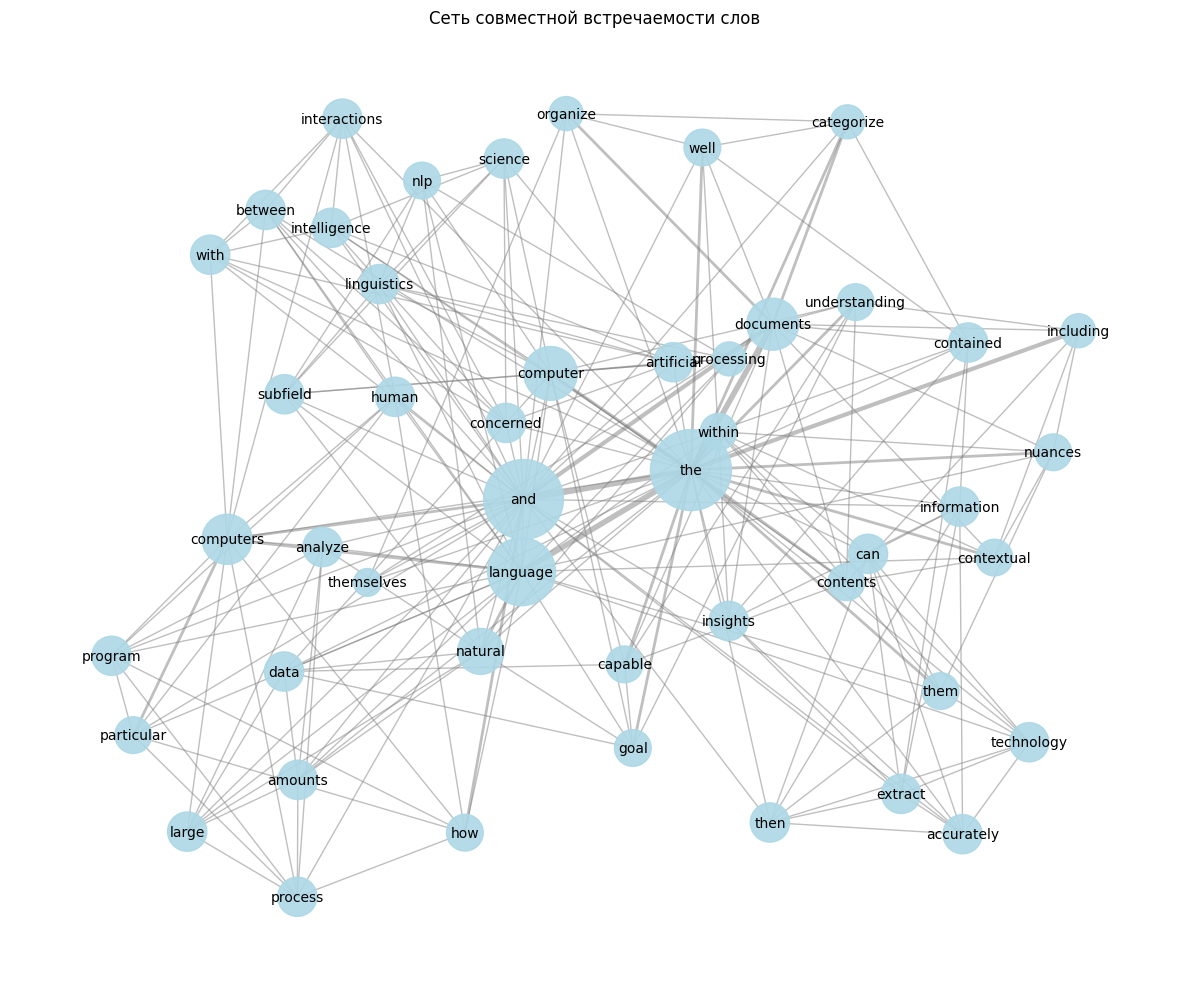

In [246]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# –ó–∞–≥—Ä—É–∑–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –¥–∞–Ω–Ω—ã—Ö NLTK (–≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è –æ–¥–∏–Ω —Ä–∞–∑)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text(text):
    """–û—á–∏—Å—Ç–∫–∞ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞."""
    # –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    text = text.lower()
    # –£–¥–∞–ª–µ–Ω–∏–µ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏ —Ü–∏—Ñ—Ä
    text = re.sub(r'[^a-z\s]', '', text)
    # –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è
    tokens = nltk.word_tokenize(text)
    # –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤
    #stop_words = set(stopwords.words('english'))  # –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ 'russian' –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

def get_frequent_ngrams(tokens, n=2, top_k=10):
    """–ü–æ–ª—É—á–µ–Ω–∏–µ —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö n-–≥—Ä–∞–º–º."""
    n_grams = list(ngrams(tokens, n))
    freq_ngrams = Counter(n_grams)
    return freq_ngrams.most_common(top_k)

def build_cooccurrence_graph(tokens, window_size=4):
    """–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∞ —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ —Å–ª–æ–≤."""
    G = nx.Graph()
    for i, word in enumerate(tokens):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            neighbor = tokens[j]
            if word != neighbor:
                if G.has_edge(word, neighbor):
                    G[word][neighbor]['weight'] += 1
                else:
                    G.add_edge(word, neighbor, weight=1)
    return G

def visualize_graph(G, title="Word Co-occurrence Network"):
    """–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≥—Ä–∞—Ñ–∞."""
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=1, iterations=50)

    # –†–∞–∑–º–µ—Ä —É–∑–ª–æ–≤ –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª–µ–Ω —Å—Ç–µ–ø–µ–Ω–∏ (–∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å–≤—è–∑–µ–π)
    degrees = dict(G.degree())
    node_sizes = [v * 100 for v in degrees.values()]

    # –í–µ—Å–∞ —Ä—ë–±–µ—Ä
    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def analyze_text(text, top_ngrams=10, window_size=4):
    """–û—Å–Ω–æ–≤–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –∞–Ω–∞–ª–∏–∑–∞ —Ç–µ–∫—Å—Ç–∞."""
    tokens = preprocess_text(text)

    print("–¢–æ–ø-10 –±–∏–≥—Ä–∞–º–º:")
    bigrams = get_frequent_ngrams(tokens, n=2, top_k=top_ngrams)
    for gram, freq in bigrams:
        print(f"{' '.join(gram)}: {freq}")

    print("\n–¢–æ–ø-10 —Ç—Ä–∏–≥—Ä–∞–º–º:")
    trigrams = get_frequent_ngrams(tokens, n=3, top_k=top_ngrams)
    for gram, freq in trigrams:
        print(f"{' '.join(gram)}: {freq}")

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≥—Ä–∞—Ñ–∞
    G = build_cooccurrence_graph(tokens, window_size=window_size)
    # –û–≥—Ä–∞–Ω–∏—á–∏–º –≥—Ä–∞—Ñ –¥–æ 50 —Å–∞–º—ã—Ö —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —É–∑–ª–æ–≤ –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
    if len(G.nodes) > 50:
        # –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ø-50 —É–∑–ª–æ–≤ –ø–æ —Å—Ç–µ–ø–µ–Ω–∏
        top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
        G = G.subgraph([node for node, deg in top_nodes]).copy()

    visualize_graph(G, "–°–µ—Ç—å —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ —Å–ª–æ–≤")

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
if __name__ == "__main__":
    sample_text = """
    Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence
    concerned with the interactions between computers and human language, in particular how to program computers
    to process and analyze large amounts of natural language data. The goal is a computer capable of understanding
    the contents of documents, including the contextual nuances of the language within them. The technology can
    then accurately extract information and insights contained in the documents as well as categorize and organize
    the documents themselves.
    """

    analyze_text(sample_text)

–¢–æ–ø-10 –±–∏–≥—Ä–∞–º–º:

–¢–æ–ø-10 —Ç—Ä–∏–≥—Ä–∞–º–º:


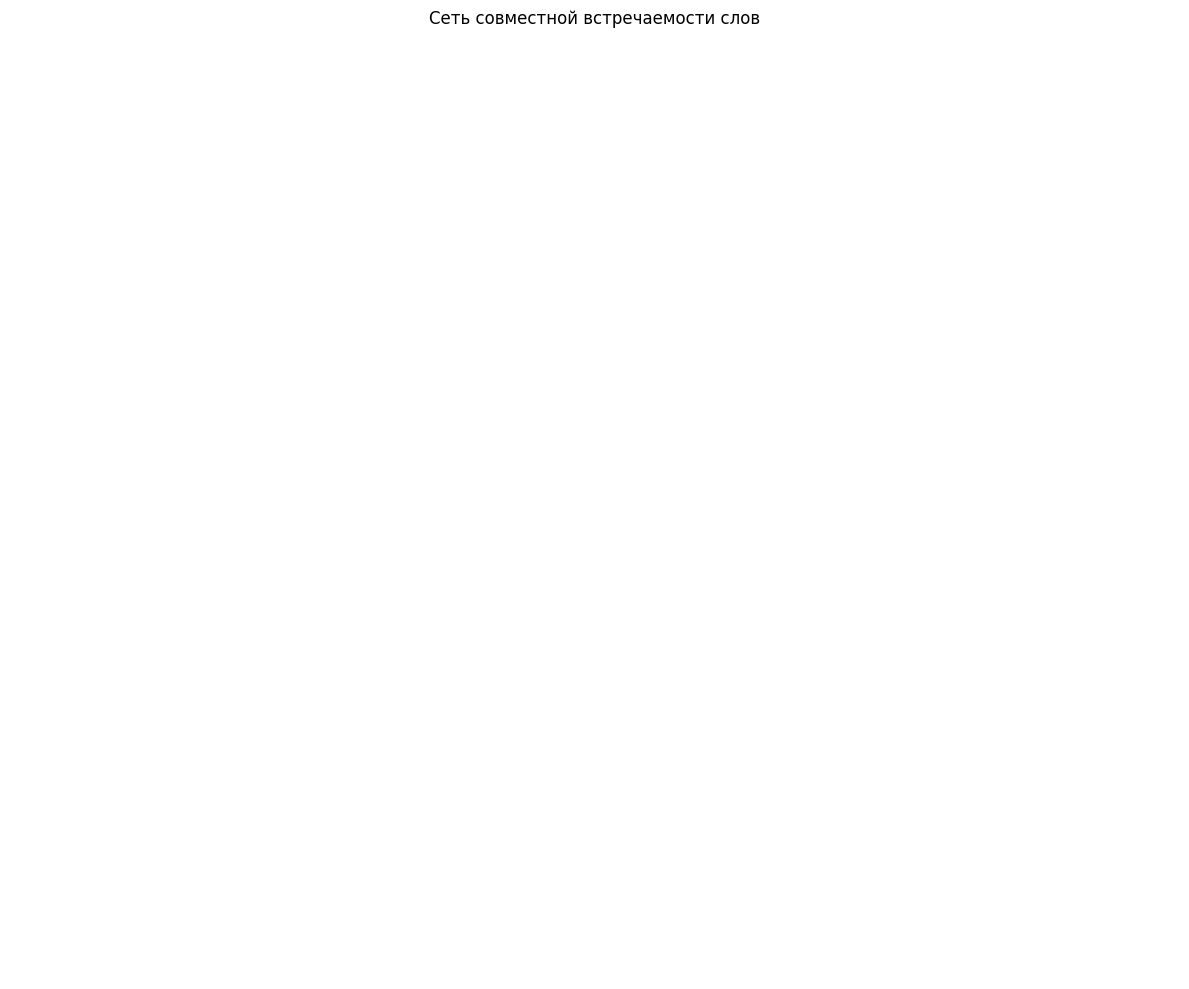

In [251]:
analyze_text(x)

–ü—Ä–∏–Ω–∏–º–∞–µ—Ç DataFrame pandas —Å —Ç–µ–∫—Å—Ç–æ–≤—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Å—Ç–æ–ª–±–µ—Ü 'text').

–û–±—ä–µ–¥–∏–Ω—è–µ—Ç –≤—Å–µ —Ç–µ–∫—Å—Ç—ã –≤ –æ–¥–∏–Ω –∫–æ—Ä–ø—É—Å (–∏–ª–∏ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –ø–æ—Å—Ç—Ä–æ—á–Ω–æ ‚Äî –ø–æ –∂–µ–ª–∞–Ω–∏—é).

–ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç —á–∞—Å—Ç–æ—Ç–Ω—ã–µ —Å–ª–æ–≤–æ—Å–æ—á–µ—Ç–∞–Ω–∏—è (–±–∏–≥—Ä–∞–º–º—ã/—Ç—Ä–∏–≥—Ä–∞–º–º—ã).

–°—Ç—Ä–æ–∏—Ç –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –≥—Ä–∞—Ñ —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ —Å–ª–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤—Å–µ–≥–æ –∫–æ—Ä–ø—É—Å–∞.

üîç –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞...

‚úÖ –í—Å–µ–≥–æ —Ç–æ–∫–µ–Ω–æ–≤: 20

üîù –¢–æ–ø-5 –±–∏–≥—Ä–∞–º–º:
natural language: 1
language processing: 1
processing wonderful: 1
wonderful field: 1
field machine: 1

üîù –¢–æ–ø-5 —Ç—Ä–∏–≥—Ä–∞–º–º:
natural language processing: 1
language processing wonderful: 1
processing wonderful field: 1
wonderful field machine: 1
field machine learning: 1

üï∏Ô∏è –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∞ —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏...
üìä –ì—Ä–∞—Ñ —Å–æ–¥–µ—Ä–∂–∏—Ç 18 —É–∑–ª–æ–≤ –∏ 64 —Ä—ë–±–µ—Ä.


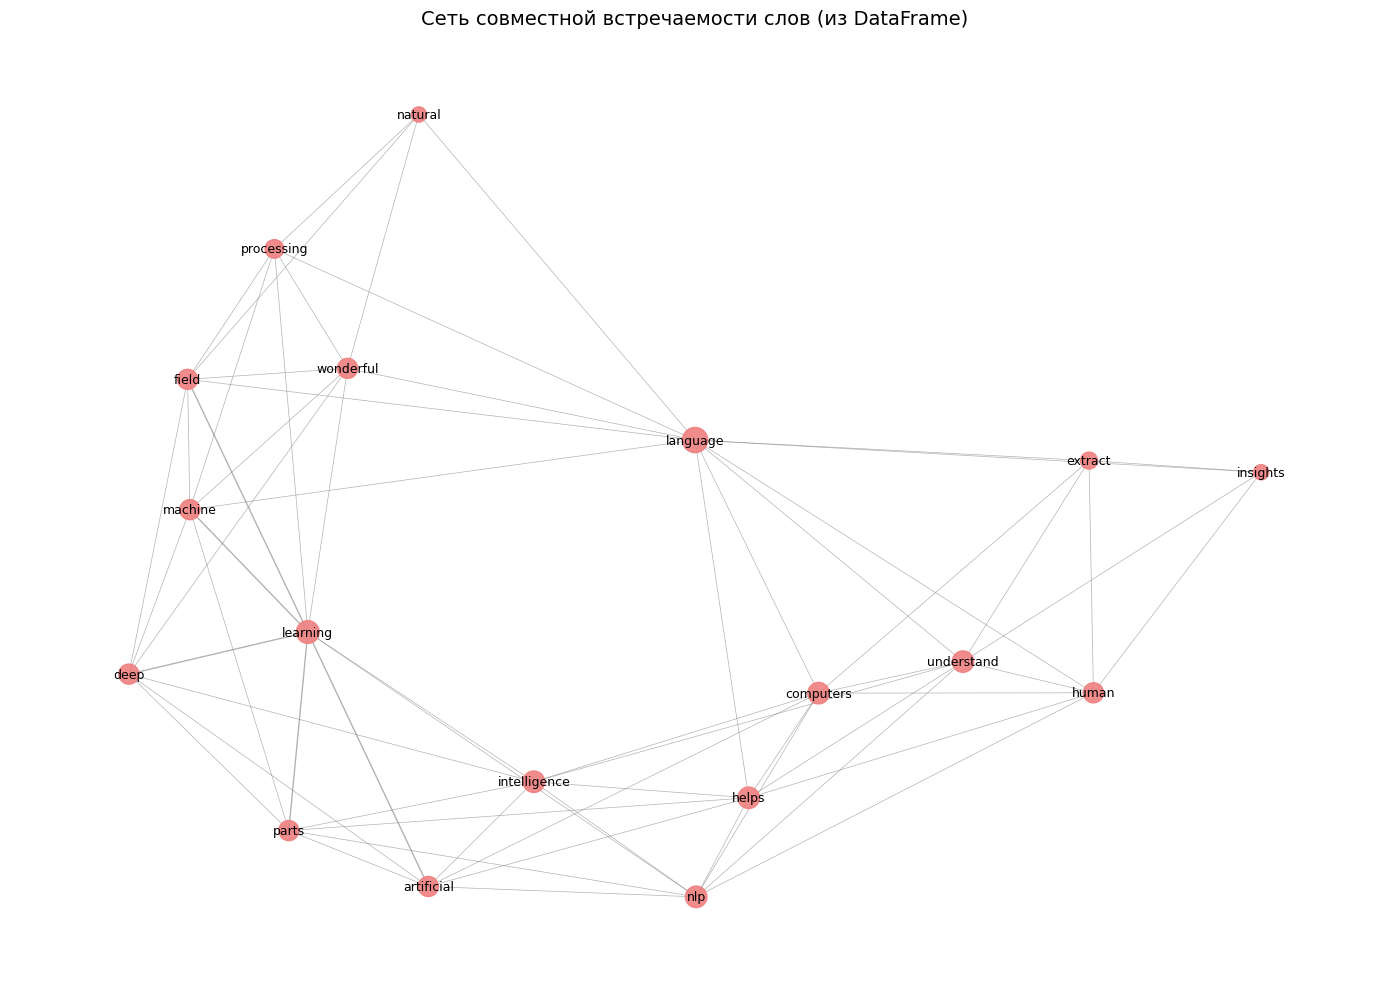

In [253]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# –ó–∞–≥—Ä—É–∑–∫–∞ NLTK-—Ä–µ—Å—É—Ä—Å–æ–≤ (—Ç–∏—Ö–æ)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text(text, language='english'):
    """
    –û—á–∏—Å—Ç–∫–∞ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –æ–¥–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞.
    –ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç 'english' –∏ 'russian'.
    """
    if pd.isna(text):
        return []
    text = str(text).lower()
    # –£–¥–∞–ª–µ–Ω–∏–µ –≤—Å–µ–≥–æ, –∫—Ä–æ–º–µ –±—É–∫–≤ –∏ –ø—Ä–æ–±–µ–ª–æ–≤
    text = re.sub(r'[^a-z–∞-—è—ë\s]', '', text, flags=re.IGNORECASE)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words(language))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

def get_corpus_from_dataframe(df, text_column='text', language='english'):
    """
    –ò–∑–≤–ª–µ–∫–∞–µ—Ç –∏ –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç –≤—Å–µ —Ç–µ–∫—Å—Ç—ã –∏–∑ —Å—Ç–æ–ª–±—Ü–∞ DataFrame –≤ –µ–¥–∏–Ω—ã–π —Å–ø–∏—Å–æ–∫ —Ç–æ–∫–µ–Ω–æ–≤.
    """
    all_tokens = []
    for text in df[text_column]:
        tokens = preprocess_text(text, language=language)
        all_tokens.extend(tokens)
    return all_tokens

def get_frequent_ngrams(tokens, n=2, top_k=10):
    """–ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–æ–ø-N n-–≥—Ä–∞–º–º."""
    n_grams = list(ngrams(tokens, n))
    freq_ngrams = Counter(n_grams)
    return freq_ngrams.most_common(top_k)

def build_cooccurrence_graph(tokens, window_size=4):
    """–°—Ç—Ä–æ–∏—Ç –≥—Ä–∞—Ñ —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ —Å–ª–æ–≤ –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –æ–∫–Ω–∞."""
    G = nx.Graph()
    for i, word in enumerate(tokens):
        for j in range(i + 1, min(i + window_size + 1, len(tokens))):
            neighbor = tokens[j]
            if word != neighbor:
                if G.has_edge(word, neighbor):
                    G[word][neighbor]['weight'] += 1
                else:
                    G.add_edge(word, neighbor, weight=1)
    return G

def visualize_graph(G, title="Word Co-occurrence Network"):
    """–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≥—Ä–∞—Ñ–∞."""
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

    degrees = dict(G.degree())
    node_sizes = [max(v * 30, 100) for v in degrees.values()]  # –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–∞–∑–º–µ—Ä —É–∑–ª–∞

    edges = G.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]
    edge_widths = [w * 0.5 for w in weights]  # –ú–∞—Å—à—Ç–∞–±–∏—Ä—É–µ–º —Ç–æ–ª—â–∏–Ω—É

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightcoral', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def analyze_dataframe(df, text_column='text', language='english', top_ngrams=10, window_size=4, max_nodes=50):
    """
    –ü–æ–ª–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤–æ–≥–æ DataFrame.

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - df: pandas.DataFrame
    - text_column: –∏–º—è —Å—Ç–æ–ª–±—Ü–∞ —Å —Ç–µ–∫—Å—Ç–æ–º
    - language: 'english' –∏–ª–∏ 'russian'
    - top_ngrams: —Å–∫–æ–ª—å–∫–æ —Ç–æ–ø-n-–≥—Ä–∞–º–º –≤—ã–≤–æ–¥–∏—Ç—å
    - window_size: —Ä–∞–∑–º–µ—Ä –æ–∫–Ω–∞ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∞
    - max_nodes: –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ —É–∑–ª–æ–≤ –≤ –≥—Ä–∞—Ñ–µ (–¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏)
    """
    print("üîç –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞...")
    tokens = get_corpus_from_dataframe(df, text_column=text_column, language=language)

    if not tokens:
        print("‚ö†Ô∏è –ù–µ—Ç —Ç–æ–∫–µ–Ω–æ–≤ –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏ —è–∑—ã–∫.")
        return

    print(f"\n‚úÖ –í—Å–µ–≥–æ —Ç–æ–∫–µ–Ω–æ–≤: {len(tokens)}")

    # –ê–Ω–∞–ª–∏–∑ n-–≥—Ä–∞–º–º
    print(f"\nüîù –¢–æ–ø-{top_ngrams} –±–∏–≥—Ä–∞–º–º:")
    bigrams = get_frequent_ngrams(tokens, n=2, top_k=top_ngrams)
    for gram, freq in bigrams:
        print(f"{' '.join(gram)}: {freq}")

    print(f"\nüîù –¢–æ–ø-{top_ngrams} —Ç—Ä–∏–≥—Ä–∞–º–º:")
    trigrams = get_frequent_ngrams(tokens, n=3, top_k=top_ngrams)
    for gram, freq in trigrams:
        print(f"{' '.join(gram)}: {freq}")

    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∞
    print("\nüï∏Ô∏è –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∞ —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏...")
    G = build_cooccurrence_graph(tokens, window_size=window_size)

    if len(G.nodes) == 0:
        print("‚ö†Ô∏è –ì—Ä–∞—Ñ –ø—É—Å—Ç. –í–æ–∑–º–æ–∂–Ω–æ, —Ç–µ–∫—Å—Ç —Å–ª–∏—à–∫–æ–º –∫–æ—Ä–æ—Ç–∫–∏–π –∏–ª–∏ –Ω–µ —Å–æ–¥–µ—Ä–∂–∏—Ç —Å–≤—è–∑–µ–π.")
        return

    # –û–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ —É–∑–ª–æ–≤ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    if len(G.nodes) > max_nodes:
        top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:max_nodes]
        G = G.subgraph([node for node, deg in top_nodes]).copy()

    print(f"üìä –ì—Ä–∞—Ñ —Å–æ–¥–µ—Ä–∂–∏—Ç {G.number_of_nodes()} —É–∑–ª–æ–≤ –∏ {G.number_of_edges()} —Ä—ë–±–µ—Ä.")
    visualize_graph(G, "–°–µ—Ç—å —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏ —Å–ª–æ–≤ (–∏–∑ DataFrame)")

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
if __name__ == "__main__":
    # –ü—Ä–∏–º–µ—Ä DataFrame
    data = {
        'id': [1, 2, 3],
        'text': [
            "Natural language processing is a wonderful field of AI.",
            "Machine learning and deep learning are parts of artificial intelligence.",
            "NLP helps computers understand human language and extract insights."
        ]
    }
    df = pd.DataFrame(data)

    # –ê–Ω–∞–ª–∏–∑
    analyze_dataframe(df, text_column='text', language='english', top_ngrams=5)

üîç –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞...

‚úÖ –í—Å–µ–≥–æ —Ç–æ–∫–µ–Ω–æ–≤: 794

üîù –¢–æ–ø-5 –±–∏–≥—Ä–∞–º–º:
–ø–ø–± –∑–æ—Ç: 16
–∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥: 16
–∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥: 15
–∞–ø—Ä–ø–≥ –∞–ø—Ä–ø–≥: 13
–∑–æ—Ç –ø–ø–±: 13

üîù –¢–æ–ø-5 —Ç—Ä–∏–≥—Ä–∞–º–º:
–∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥: 5
–∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥: 5
–ø–ø–± –∑–æ—Ç –∞–ø–Ω–±–∫: 4
–ø–ø–± –∑–æ—Ç –ø–ø–±: 4
–∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥ –ø–ø–±: 3

üï∏Ô∏è –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∞ —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏...
üìä –ì—Ä–∞—Ñ —Å–æ–¥–µ—Ä–∂–∏—Ç 50 —É–∑–ª–æ–≤ –∏ 386 —Ä—ë–±–µ—Ä.


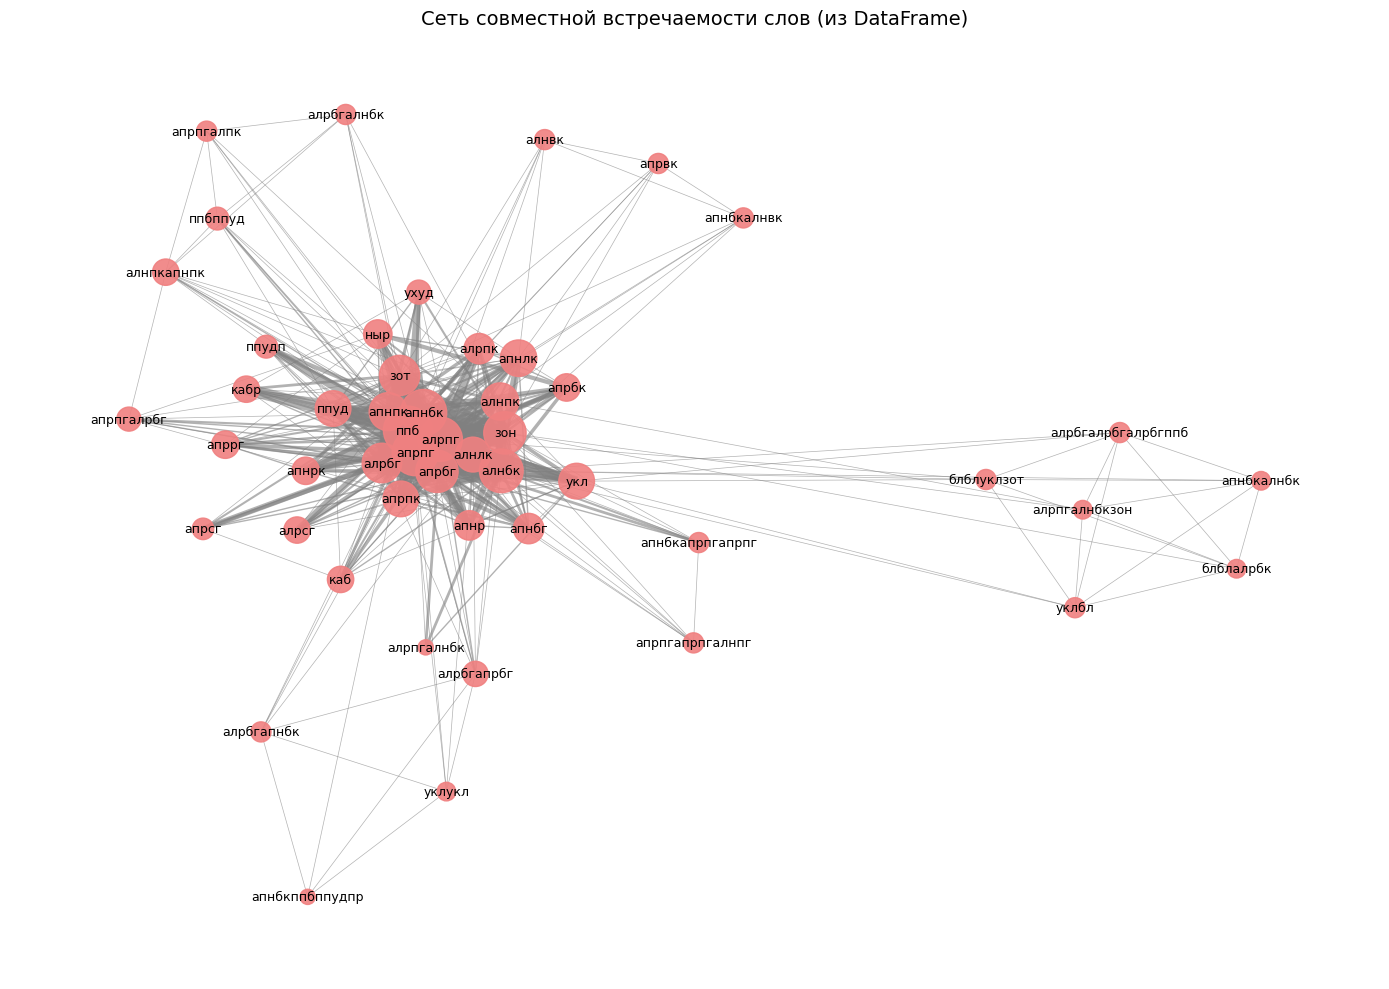

In [254]:
df_ru = pd.DataFrame({
    'review': [
        "–≠—Ç–æ—Ç —Ñ–∏–ª—å–º –æ—á–µ–Ω—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π –∏ –∑–∞—Ö–≤–∞—Ç—ã–≤–∞—é—â–∏–π.",
        "–ú–Ω–µ –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è —Å—é–∂–µ—Ç, –Ω–æ –∞–∫—Ç—ë—Ä—ã –∏–≥—Ä–∞–ª–∏ –æ—Ç–ª–∏—á–Ω–æ.",
        "–ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π —Å—é–∂–µ—Ç –∏ –æ—Ç–ª–∏—á–Ω–∞—è –∏–≥—Ä–∞ –∞–∫—Ç—ë—Ä–æ–≤."
    ]
})

analyze_dataframe(df_word, text_column='act', language='russian', top_ngrams=5)

–¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∑–≤–æ–ª—è–µ—Ç:

–í—ã–±—Ä–∞—Ç—å –æ–¥–Ω–æ –∏–ª–∏ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ['ai', 'language']),

–ù–∞–π—Ç–∏ –≤—Å–µ –±–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ —ç—Ç–∏ —Å–ª–æ–≤–∞,

–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –ø–æ–¥–≥—Ä–∞—Ñ, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–π —Å–≤—è–∑–∏ —ç—Ç–∏—Ö —Å–ª–æ–≤ —Å –∏—Ö —Å–æ—Å–µ–¥—è–º–∏ –≤ –∫–æ—Ä–ø—É—Å–µ,

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ª–æ–∫–∞–ª—å–Ω—É—é —Å–µ—Ç—å –≤–æ–∫—Ä—É–≥ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö —Å–ª–æ–≤.

–≠—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –ø–æ–ª–µ–∑–Ω–æ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ —É–ø–æ–º–∏–Ω–∞–Ω–∏—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Ç–µ—Ä–º–∏–Ω–æ–≤.
–î–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞: target_words=['–º–æ–¥–µ–ª—å', '—è–∑—ã–∫'], language='russian'.

–§—É–Ω–∫—Ü–∏—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø–æ–∫–∞–∂–µ—Ç:

–ì—Ä–∞—Ñ —Å –≤—ã–¥–µ–ª–µ–Ω–Ω—ã–º–∏ —Ü–µ–ª–µ–≤—ã–º–∏ —Å–ª–æ–≤–∞–º–∏ (–∫—Ä–∞—Å–Ω—ã–µ —É–∑–ª—ã),

–ò—Ö –ø—Ä—è–º—ã–µ —Å–≤—è–∑–∏,

–¢–æ–ø –±–∏–≥—Ä–∞–º–º/—Ç—Ä–∏–≥—Ä–∞–º–º —Å —É—á–∞—Å—Ç–∏–µ–º —ç—Ç–∏—Ö —Å–ª–æ–≤.

In [255]:
def visualize_word_context(df, target_words, text_column='text', language='english', window_size=4, max_hops=1):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –∫–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã–µ —Å–≤—è–∑–∏ –¥–ª—è –∑–∞–¥–∞–Ω–Ω—ã—Ö —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤.

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - df: pandas.DataFrame —Å —Ç–µ–∫—Å—Ç–∞–º–∏
    - target_words: —Å–ø–∏—Å–æ–∫ —Å–ª–æ–≤ (–≤ –Ω–∏–∂–Ω–µ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ!), –Ω–∞–ø—Ä–∏–º–µ—Ä ['ai', 'nlp']
    - text_column: –∏–º—è —Å—Ç–æ–ª–±—Ü–∞ —Å —Ç–µ–∫—Å—Ç–æ–º
    - language: 'english' –∏–ª–∏ 'russian'
    - window_size: —Ä–∞–∑–º–µ—Ä –æ–∫–Ω–∞ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∞
    - max_hops: –≥–ª—É–±–∏–Ω–∞ –ø–æ–∏—Å–∫–∞ —Å–æ—Å–µ–¥–µ–π (1 = –ø—Ä—è–º—ã–µ —Å–æ—Å–µ–¥–∏, 2 = —Å–æ—Å–µ–¥–∏ —Å–æ—Å–µ–¥–µ–π –∏ —Ç.–¥.)
    """
    target_words = [word.lower() for word in target_words]

    # –ü–æ–ª—É—á–∞–µ–º –ø–æ–ª–Ω—ã–π –∫–æ—Ä–ø—É—Å —Ç–æ–∫–µ–Ω–æ–≤
    tokens = get_corpus_from_dataframe(df, text_column=text_column, language=language)
    if not tokens:
        print("‚ö†Ô∏è –ö–æ—Ä–ø—É—Å –ø—É—Å—Ç –ø–æ—Å–ª–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏.")
        return

    # –°—Ç—Ä–æ–∏–º –ø–æ–ª–Ω—ã–π –≥—Ä–∞—Ñ —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏
    full_graph = build_cooccurrence_graph(tokens, window_size=window_size)

    # –ù–∞—Ö–æ–¥–∏–º –ø–æ–¥–≥—Ä–∞—Ñ –≤–æ–∫—Ä—É–≥ —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤
    nodes_to_include = set()
    for word in target_words:
        if word in full_graph:
            # –ü—Ä—è–º—ã–µ —Å–æ—Å–µ–¥–∏ (1-hop)
            neighbors = set(full_graph.neighbors(word))
            nodes_to_include.update([word])
            nodes_to_include.update(neighbors)

            # –ï—Å–ª–∏ –Ω—É–∂–Ω–æ ‚Äî –¥–æ–±–∞–≤–ª—è–µ–º —Å–æ—Å–µ–¥–µ–π 2-–≥–æ –ø–æ—Ä—è–¥–∫–∞
            if max_hops >= 2:
                for n in neighbors:
                    if n in full_graph:
                        nodes_to_include.update(full_graph.neighbors(n))
        else:
            print(f"‚ö†Ô∏è –°–ª–æ–≤–æ '{word}' –Ω–µ –Ω–∞–π–¥–µ–Ω–æ –≤ –≥—Ä–∞—Ñ–µ.")

    if not nodes_to_include:
        print("‚ùå –ù–∏ –æ–¥–Ω–æ –∏–∑ —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤ –Ω–µ –Ω–∞–π–¥–µ–Ω–æ –≤ —Ç–µ–∫—Å—Ç–µ.")
        return

    # –°–æ–∑–¥–∞—ë–º –ø–æ–¥–≥—Ä–∞—Ñ
    subgraph = full_graph.subgraph(nodes_to_include).copy()

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    plt.figure(figsize=(12, 9))
    pos = nx.spring_layout(subgraph, k=1.0, iterations=100, seed=42)

    # –¶–≤–µ—Ç–∞: —Ü–µ–ª–µ–≤—ã–µ —Å–ª–æ–≤–∞ ‚Äî –∫—Ä–∞—Å–Ω—ã–µ, –æ—Å—Ç–∞–ª—å–Ω—ã–µ ‚Äî —Å–∏–Ω–∏–µ
    node_colors = []
    node_sizes = []
    for node in subgraph.nodes():
        if node in target_words:
            node_colors.append('red')
            node_sizes.append(800)  # –ö—Ä—É–ø–Ω–µ–µ
        else:
            node_colors.append('lightblue')
            node_sizes.append(300)

    # –†—ë–±—Ä–∞
    edges = subgraph.edges(data=True)
    weights = [d['weight'] for (u, v, d) in edges]
    edge_widths = [w * 0.8 for w in weights]

    nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9)
    nx.draw_networkx_edges(subgraph, pos, width=edge_widths, alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(subgraph, pos, font_size=10, font_family='sans-serif')

    # –õ–µ–≥–µ–Ω–¥–∞
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='–¶–µ–ª–µ–≤—ã–µ —Å–ª–æ–≤–∞', markerfacecolor='red', markersize=12),
        Line2D([0], [0], marker='o', color='w', label='–ö–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã–µ —Å–ª–æ–≤–∞', markerfacecolor='lightblue', markersize=12)
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.title(f"–ö–æ–Ω—Ç–µ–∫—Å—Ç–Ω—ã–µ —Å–≤—è–∑–∏ –¥–ª—è —Å–ª–æ–≤: {', '.join(target_words)}", fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ: –≤—ã–≤–æ–¥ –±–∏–≥—Ä–∞–º–º –∏ —Ç—Ä–∏–≥—Ä–∞–º–º —Å —É—á–∞—Å—Ç–∏–µ–º —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤
    print(f"\nüîç –ë–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã —Å —É—á–∞—Å—Ç–∏–µ–º —Å–ª–æ–≤: {target_words}")

    # –ü–æ–ª—É—á–∞–µ–º –≤—Å–µ n-–≥—Ä–∞–º–º—ã –∏–∑ –∫–æ—Ä–ø—É—Å–∞
    bigrams_all = list(ngrams(tokens, 2))
    trigrams_all = list(ngrams(tokens, 3))

    # –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è
    bigrams_with_target = [gram for gram in bigrams_all if any(w in target_words for w in gram)]
    trigrams_with_target = [gram for gram in trigrams_all if any(w in target_words for w in gram)]

    # –ü–æ–¥—Å—á—ë—Ç —á–∞—Å—Ç–æ—Ç
    bigram_counts = Counter(bigrams_with_target)
    trigram_counts = Counter(trigrams_with_target)

    print("\nüîù –¢–æ–ø-10 –±–∏–≥—Ä–∞–º–º —Å —É—á–∞—Å—Ç–∏–µ–º —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤:")
    for gram, freq in bigram_counts.most_common(10):
        print(f"{' '.join(gram)}: {freq}")

    print("\nüîù –¢–æ–ø-10 —Ç—Ä–∏–≥—Ä–∞–º–º —Å —É—á–∞—Å—Ç–∏–µ–º —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤:")
    for gram, freq in trigram_counts.most_common(10):
        print(f"{' '.join(gram)}: {freq}")

=== –û–±—â–∏–π –∞–Ω–∞–ª–∏–∑ ===
üîç –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞...

‚úÖ –í—Å–µ–≥–æ —Ç–æ–∫–µ–Ω–æ–≤: 29

üîù –¢–æ–ø-5 –±–∏–≥—Ä–∞–º–º:
artificial intelligence: 2
natural language: 1
language processing: 1
processing wonderful: 1
wonderful field: 1

üîù –¢–æ–ø-5 —Ç—Ä–∏–≥—Ä–∞–º–º:
natural language processing: 1
language processing wonderful: 1
processing wonderful field: 1
wonderful field artificial: 1
field artificial intelligence: 1

üï∏Ô∏è –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∞ —Å–æ–≤–º–µ—Å—Ç–Ω–æ–π –≤—Å—Ç—Ä–µ—á–∞–µ–º–æ—Å—Ç–∏...
üìä –ì—Ä–∞—Ñ —Å–æ–¥–µ—Ä–∂–∏—Ç 24 —É–∑–ª–æ–≤ –∏ 95 —Ä—ë–±–µ—Ä.


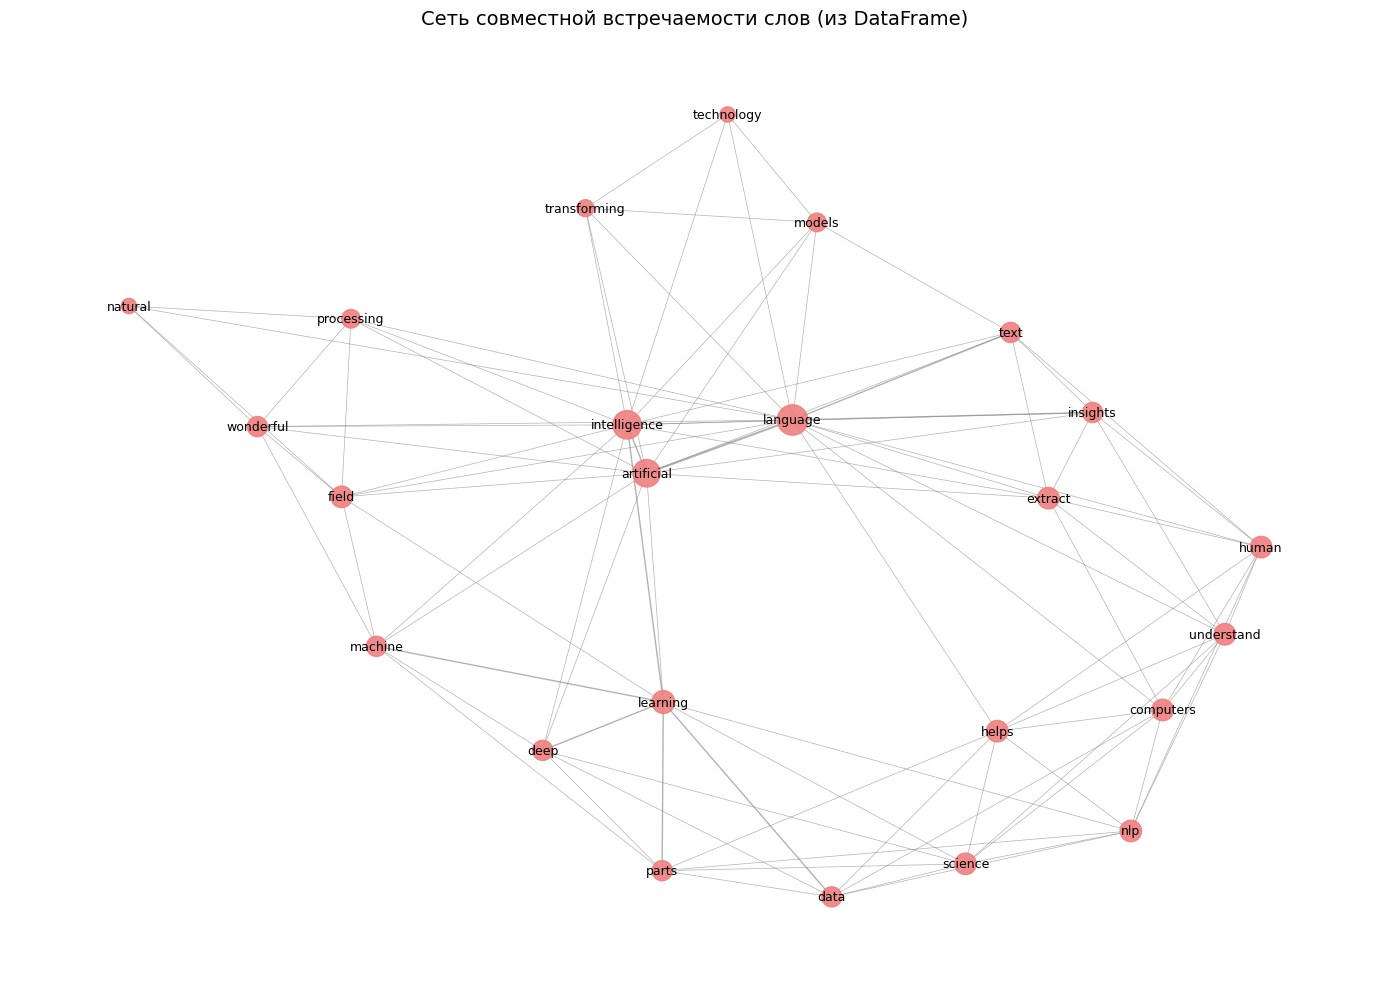


=== –ê–Ω–∞–ª–∏–∑ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –¥–ª—è —Å–ª–æ–≤: 'ai', 'language' ===
‚ö†Ô∏è –°–ª–æ–≤–æ 'ai' –Ω–µ –Ω–∞–π–¥–µ–Ω–æ –≤ –≥—Ä–∞—Ñ–µ.


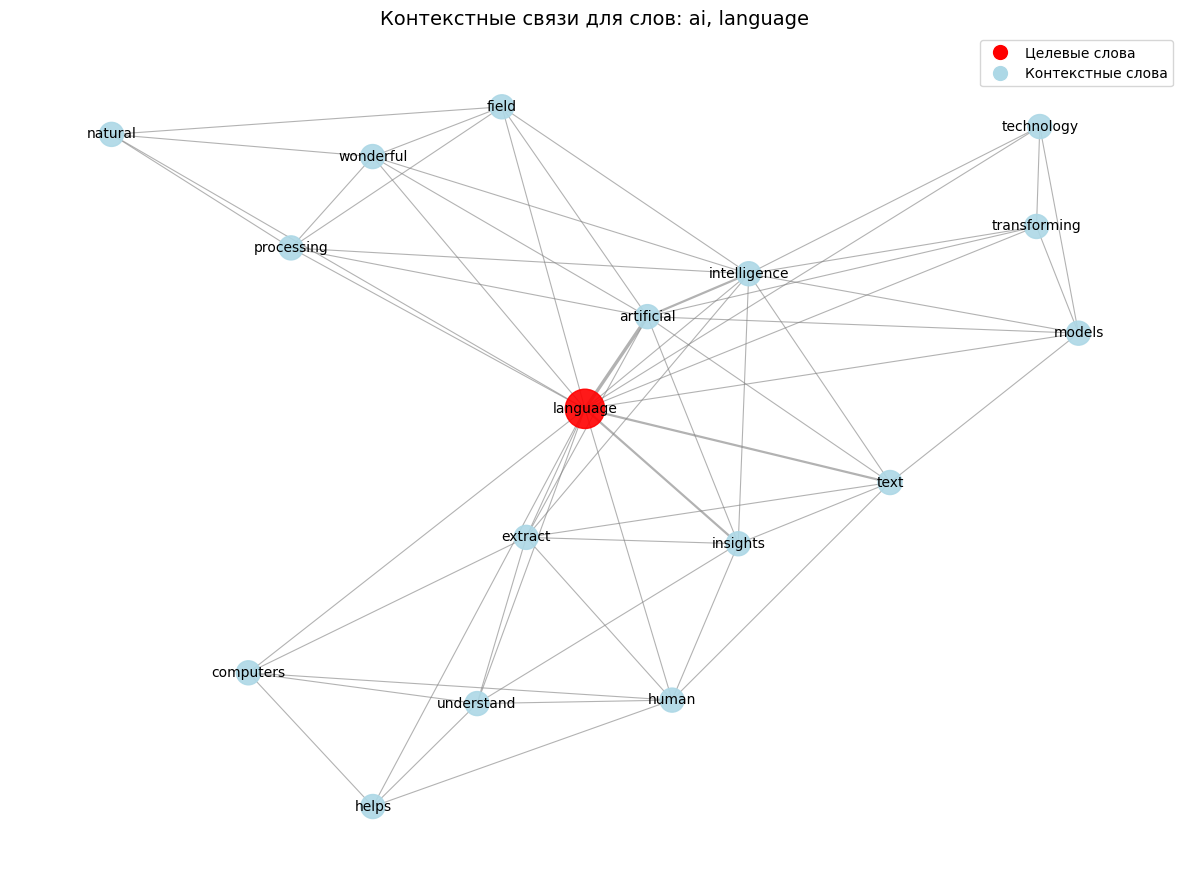


üîç –ë–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã —Å —É—á–∞—Å—Ç–∏–µ–º —Å–ª–æ–≤: ['ai', 'language']

üîù –¢–æ–ø-10 –±–∏–≥—Ä–∞–º–º —Å —É—á–∞—Å—Ç–∏–µ–º —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤:
natural language: 1
language processing: 1
human language: 1
language extract: 1
intelligence language: 1
language models: 1

üîù –¢–æ–ø-10 —Ç—Ä–∏–≥—Ä–∞–º–º —Å —É—á–∞—Å—Ç–∏–µ–º —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤:
natural language processing: 1
language processing wonderful: 1
understand human language: 1
human language extract: 1
language extract insights: 1
artificial intelligence language: 1
intelligence language models: 1
language models transforming: 1


In [257]:
if __name__ == "__main__":
    # –ü—Ä–∏–º–µ—Ä DataFrame
    data = {
        'id': [1, 2, 3, 4],
        'text': [
            "Natural language processing is a wonderful field of artificial intelligence.",
            "Machine learning and deep learning are parts of AI and data science.",
            "NLP helps computers understand human language and extract insights from text.",
            "Artificial intelligence and language models are transforming technology."
        ]
    }
    df = pd.DataFrame(data)

    # 1. –û–±—â–∏–π –∞–Ω–∞–ª–∏–∑
    print("=== –û–±—â–∏–π –∞–Ω–∞–ª–∏–∑ ===")
    analyze_dataframe(df, text_column='text', language='english', top_ngrams=5)

    # 2. –ê–Ω–∞–ª–∏–∑ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Å–ª–æ–≤
    print("\n=== –ê–Ω–∞–ª–∏–∑ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –¥–ª—è —Å–ª–æ–≤: 'ai', 'language' ===")
    visualize_word_context(
        df,
        target_words=['ai', 'language'],  # —Å–ª–æ–≤–∞ –≤ –Ω–∏–∂–Ω–µ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ!
        text_column='text',
        language='english',
        window_size=4,
        max_hops=1
    )


=== –ê–Ω–∞–ª–∏–∑ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –¥–ª—è —Å–ª–æ–≤: 'ai', 'language' ===


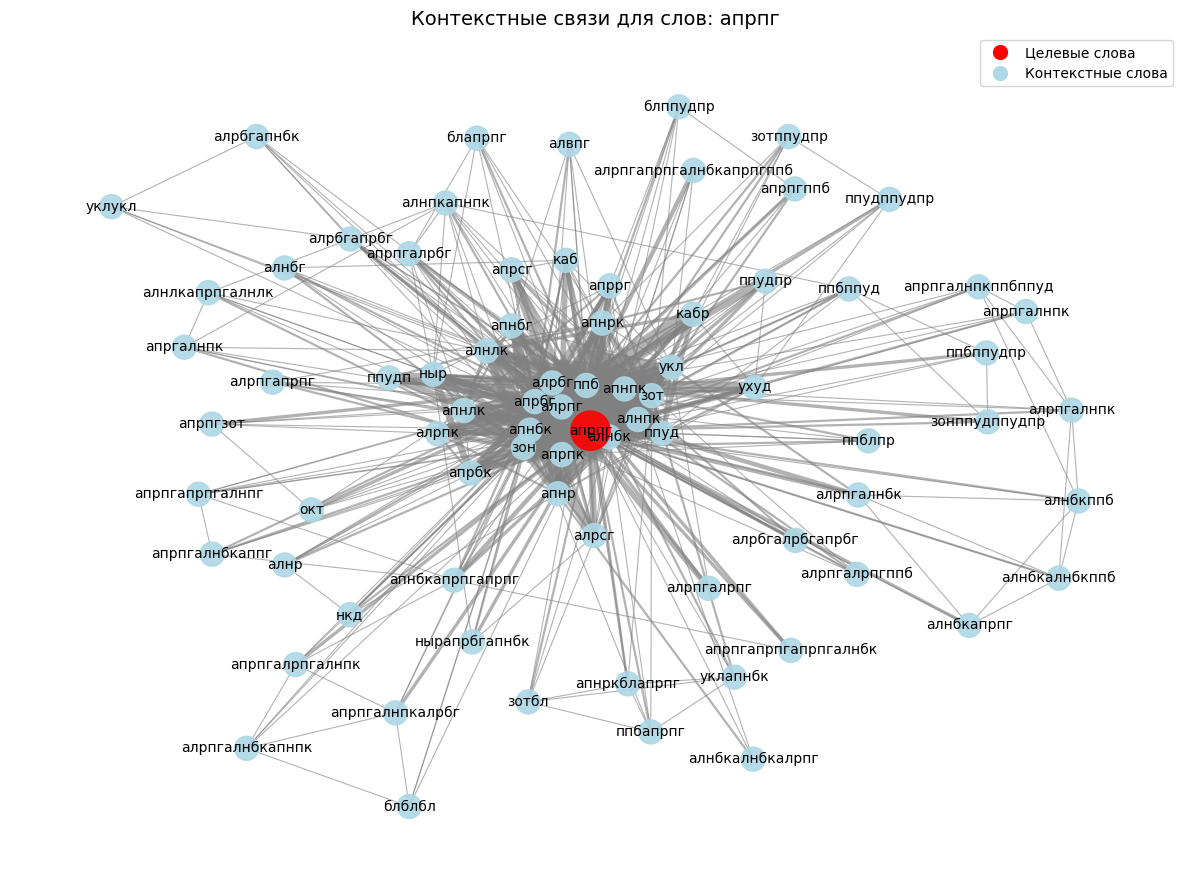


üîç –ë–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã —Å —É—á–∞—Å—Ç–∏–µ–º —Å–ª–æ–≤: ['–∞–ø—Ä–ø–≥']

üîù –¢–æ–ø-10 –±–∏–≥—Ä–∞–º–º —Å —É—á–∞—Å—Ç–∏–µ–º —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤:
–∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥: 16
–∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥: 15
–∞–ø—Ä–ø–≥ –∞–ø—Ä–ø–≥: 13
–∞–ø—Ä–ø–≥ –ø–ø–±: 12
–ø–ø–± –∞–ø—Ä–ø–≥: 11
–∞–ø—Ä–ø–≥ –∞–ª–Ω–±–∫: 7
–∞–ø–Ω–ø–∫ –∞–ø—Ä–ø–≥: 6
–∞–ø–Ω–±–∫ –∞–ø—Ä–ø–≥: 6
–∞–ø—Ä–ø–≥ –∞–ø–Ω–±–∫: 6
–∑–æ–Ω –∞–ø—Ä–ø–≥: 6

üîù –¢–æ–ø-10 —Ç—Ä–∏–≥—Ä–∞–º–º —Å —É—á–∞—Å—Ç–∏–µ–º —Ü–µ–ª–µ–≤—ã—Ö —Å–ª–æ–≤:
–∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥: 5
–∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥: 5
–∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥ –ø–ø–±: 3
–∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥ –∞–ø–Ω–±–∫: 3
–ø–ø–± –∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥: 3
–∞–ø—Ä–ø–≥ –∞–ª—Ä—Å–≥ –∞–ø–Ω–±–∫: 3
–∞–ø—Ä–ø–≥ –ø–ø–± –∑–æ—Ç: 3
–∞–ø—Ä–ø–≥ –∞–ø—Ä–ø–≥ –∞–ª—Ä–ø–≥: 2
–∑–æ—Ç –∞–ø–Ω–ø–∫ –∞–ø—Ä–ø–≥: 2
–∞–ø—Ä–ø–≥ –∞–ø–Ω–ø–∫ –∞–ø—Ä–±–≥: 2


In [258]:
    # 2. –ê–Ω–∞–ª–∏–∑ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö —Å–ª–æ–≤
    print("\n=== –ê–Ω–∞–ª–∏–∑ –∫–æ–Ω—Ç–µ–∫—Å—Ç–∞ –¥–ª—è —Å–ª–æ–≤: 'ai', 'language' ===")
    visualize_word_context(
        df_word,
        target_words=['–∞–ø—Ä–ø–≥'],  # —Å–ª–æ–≤–∞ –≤ –Ω–∏–∂–Ω–µ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ!
        text_column='act',
        language='russian',
        window_size=4,
        max_hops=1
    )

—Å–∫—Ä–∏–ø—Ç, –∫–æ—Ç–æ—Ä—ã–π:

–ò–∑–≤–ª–µ–∫–∞–µ—Ç —Å–ª–æ–≤–∞, –±–∏–≥—Ä–∞–º–º—ã –∏ —Ç—Ä–∏–≥—Ä–∞–º–º—ã –∏–∑ —Ç–µ–∫—Å—Ç–æ–≤–æ–≥–æ –∫–æ—Ä–ø—É—Å–∞ (–∏–∑ pandas DataFrame).

–°—Ç—Ä–æ–∏—Ç –≤–µ–∫—Ç–æ—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è (TF-IDF) –¥–ª—è –≤—Å–µ—Ö n-–≥—Ä–∞–º–º.

–í—ã–ø–æ–ª–Ω—è–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Å –ø–æ–º–æ—â—å—é –∞–ª–≥–æ—Ä–∏—Ç–º–∞ K-Means.

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ—Ç –∫–ª–∞—Å—Ç–µ—Ä—ã —Å –ø–æ–º–æ—â—å—é t-SNE (–¥–ª—è 2D-–ø—Ä–æ–µ–∫—Ü–∏–∏).

–ü–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –ª—é–±–æ–π —è–∑—ã–∫ (–∞–Ω–≥–ª–∏–π—Å–∫–∏–π/—Ä—É—Å—Å–∫–∏–π) –∏ —Ä–∞–±–æ—Ç–∞–µ—Ç —Å pandas DataFrame.


In [ ]:
pip install pandas nltk scikit-learn matplotlib seaborn

In [259]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np

# –ó–∞–≥—Ä—É–∑–∫–∞ NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

def preprocess_text_simple(text, language='english'):
    """–ü—Ä–æ—Å—Ç–∞—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞: –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä, —É–¥–∞–ª–µ–Ω–∏–µ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏, —Å—Ç–æ–ø-—Å–ª–æ–≤–∞."""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-z–∞-—è—ë\s]', ' ', text, flags=re.IGNORECASE)
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words(language))
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

def get_all_ngrams_as_strings(df, text_column='text', language='english', include_unigrams=True, include_bigrams=True, include_trigrams=True):
    """
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ —Å—Ç—Ä–æ–∫: –∫–∞–∂–¥–∞—è —Å—Ç—Ä–æ–∫–∞ ‚Äî —ç—Ç–æ —Å–ª–æ–≤–æ, –±–∏–≥—Ä–∞–º–º–∞ –∏–ª–∏ —Ç—Ä–∏–≥—Ä–∞–º–º–∞.
    –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö n-–≥—Ä–∞–º–º –∫–∞–∫ "–¥–æ–∫—É–º–µ–Ω—Ç–æ–≤".
    """
    all_ngrams_list = []

    for text in df[text_column]:
        clean = preprocess_text_simple(text, language=language)
        if not clean.strip():
            continue
        tokens = clean.split()

        if include_unigrams:
            all_ngrams_list.extend(tokens)
        if include_bigrams and len(tokens) >= 2:
            bigrams = [' '.join(gram) for gram in ngrams(tokens, 2)]
            all_ngrams_list.extend(bigrams)
        if include_trigrams and len(tokens) >= 3:
            trigrams_list = [' '.join(gram) for gram in ngrams(tokens, 3)]
            all_ngrams_list.extend(trigrams_list)

    # –£–¥–∞–ª—è–µ–º –¥—É–±–ª–∏–∫–∞—Ç—ã? –ù–µ—Ç ‚Äî –æ—Å—Ç–∞–≤–ª—è–µ–º —á–∞—Å—Ç–æ—Ç—É –¥–ª—è TF-IDF!
    return all_ngrams_list

def cluster_ngrams(df, text_column='text', language='english',
                   include_unigrams=True, include_bigrams=True, include_trigrams=True,
                   n_clusters=5, ngram_min_df=1, ngram_max_features=1000,
                   random_state=42):
    """
    –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è n-–≥—Ä–∞–º–º (—Å–ª–æ–≤, –±–∏–≥—Ä–∞–º–º, —Ç—Ä–∏–≥—Ä–∞–º–º) –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö "–¥–æ–∫—É–º–µ–Ω—Ç–æ–≤".
    """
    print("üîç –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö n-–≥—Ä–∞–º–º...")
    ngram_docs = get_all_ngrams_as_strings(
        df, text_column=text_column, language=language,
        include_unigrams=include_unigrams,
        include_bigrams=include_bigrams,
        include_trigrams=include_trigrams
    )

    if len(ngram_docs) == 0:
        print("‚ö†Ô∏è –ù–µ—Ç n-–≥—Ä–∞–º–º –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏.")
        return

    print(f"‚úÖ –í—Å–µ–≥–æ n-–≥—Ä–∞–º–º (—Å –ø–æ–≤—Ç–æ—Ä–∞–º–∏): {len(ngram_docs)}")
    unique_ngrams = list(set(ngram_docs))
    print(f"‚úÖ –£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö n-–≥—Ä–∞–º–º: {len(unique_ngrams)}")

    # –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è: –∫–∞–∂–¥–∞—è n-–≥—Ä–∞–º–º–∞ ‚Äî "–¥–æ–∫—É–º–µ–Ω—Ç", TF-IDF –ø–æ —Å–∏–º–≤–æ–ª–∞–º –∏–ª–∏ –ø–æ–¥-n-–≥—Ä–∞–º–º–∞–º?
    # –ù–æ —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Ñ—Ä–∞–∑—ã, –ª—É—á—à–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å char-ngrams –∏–ª–∏ –ø—Ä–æ—Å—Ç–æ 1-–≤–µ–∫—Ç–æ—Ä –Ω–∞ —Ñ—Ä–∞–∑—É.
    # –û–¥–Ω–∞–∫–æ –¥–ª—è —Å—Ö–æ–∂–µ—Å—Ç–∏ —Ñ—Ä–∞–∑ (–Ω–∞–ø—Ä–∏–º–µ—Ä, "machine learning" –∏ "deep learning") ‚Äî –∏—Å–ø–æ–ª—å–∑—É–µ–º char-level TF-IDF.

    # –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–∞: —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∂–¥—É—é n-–≥—Ä–∞–º–º—É –∫–∞–∫ –¥–æ–∫—É–º–µ–Ω—Ç –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å word-level TF-IDF –ø–æ –µ—ë —Å–ª–æ–≤–∞–º.
    # –ù–æ —É –Ω–∞—Å –∫–∞–∂–¥–∞—è "—Ñ—Ä–∞–∑–∞" ‚Äî —É–∂–µ —Ç–æ–∫–µ–Ω. –ü–æ—ç—Ç–æ–º—É –ø—Ä–æ—â–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å **char-ngram TF-IDF** –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å—Ç—Ä–æ–∫.

    vectorizer = TfidfVectorizer(
        analyzer='char_wb',        # char-level —Å –≥—Ä–∞–Ω–∏—Ü–∞–º–∏ —Å–ª–æ–≤
        ngram_range=(2, 5),        # 2‚Äì5 —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö n-–≥—Ä–∞–º–º
        min_df=ngram_min_df,
        max_features=ngram_max_features
    )

    X = vectorizer.fit_transform(unique_ngrams)
    print(f"üìä –†–∞–∑–º–µ—Ä –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {X.shape}")

    # –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
    print(f"üß† –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –Ω–∞ {n_clusters} –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    clusters = kmeans.fit_predict(X)

    # –°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    print("üìâ –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ t-SNE –¥–ª—è 2D-–≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏...")
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=min(30, len(unique_ngrams)-1))
    X_tsne = tsne.fit_transform(X.toarray())

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    plt.figure(figsize=(12, 9))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='tab10', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(f"–ö–ª–∞—Å—Ç–µ—Ä—ã n-–≥—Ä–∞–º–º (—Å–ª–æ–≤, –±–∏–≥—Ä–∞–º–º, —Ç—Ä–∏–≥—Ä–∞–º–º) ‚Äî {n_clusters} –∫–ª–∞—Å—Ç–µ—Ä–æ–≤", fontsize=14)
    plt.xlabel("t-SNE –∫–æ–º–ø–æ–Ω–µ–Ω—Ç 1")
    plt.ylabel("t-SNE –∫–æ–º–ø–æ–Ω–µ–Ω—Ç 2")
    plt.tight_layout()
    plt.show()

    # –í—ã–≤–æ–¥ –ø—Ä–∏–º–µ—Ä–æ–≤ –∏–∑ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
    df_ngrams = pd.DataFrame({
        'ngram': unique_ngrams,
        'cluster': clusters
    })

    print(f"\nüîç –ü—Ä–∏–º–µ—Ä—ã n-–≥—Ä–∞–º–º –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º (—Ç–æ–ø-5 –Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä):")
    for cluster_id in range(n_clusters):
        examples = df_ngrams[df_ngrams['cluster'] == cluster_id]['ngram'].head(5).tolist()
        print(f"\n–ö–ª–∞—Å—Ç–µ—Ä {cluster_id}:")
        for ex in examples:
            print(f"  - {ex}")

    return df_ngrams, X, clusters

üîç –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö n-–≥—Ä–∞–º–º...
‚úÖ –í—Å–µ–≥–æ n-–≥—Ä–∞–º–º (—Å –ø–æ–≤—Ç–æ—Ä–∞–º–∏): 126
‚úÖ –£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö n-–≥—Ä–∞–º–º: 114
üìä –†–∞–∑–º–µ—Ä –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: (114, 775)
üß† –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –Ω–∞ 4 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...
üìâ –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ t-SNE –¥–ª—è 2D-–≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏...


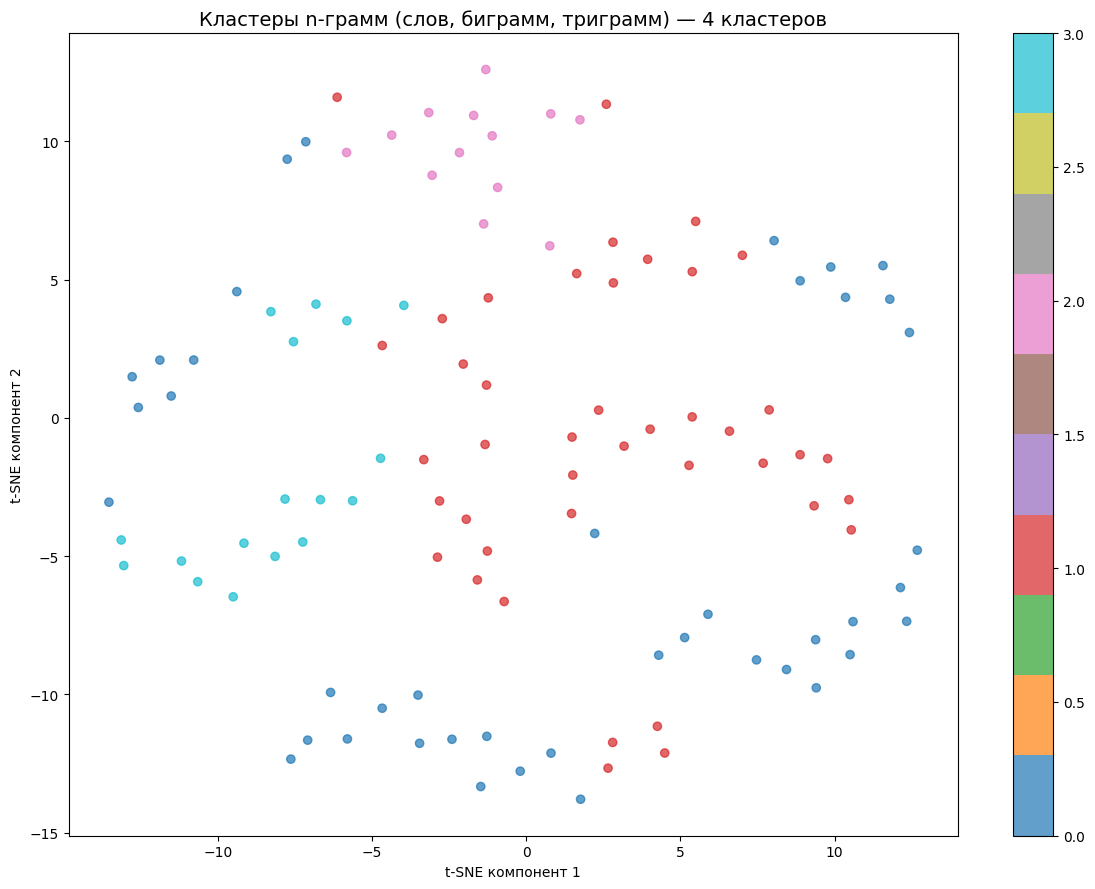


üîç –ü—Ä–∏–º–µ—Ä—ã n-–≥—Ä–∞–º–º –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º (—Ç–æ–ø-5 –Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä):

–ö–ª–∞—Å—Ç–µ—Ä 0:
  - powerful gpus
  - bert gpt transforming
  - combines
  - neural
  - domain

–ö–ª–∞—Å—Ç–µ—Ä 1:
  - intelligence uses
  - language models
  - models require large
  - require large
  - artificial intelligence uses

–ö–ª–∞—Å—Ç–µ—Ä 2:
  - learning deep learning
  - learning deep
  - learning models require
  - machine learning deep
  - learning models

–ö–ª–∞—Å—Ç–µ—Ä 3:
  - computers understand
  - models like bert
  - helps computers understand
  - human
  - nlp helps


In [262]:
if __name__ == "__main__":
    # –ü—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö
    data = {
        'text': [
            "Natural language processing is a subfield of artificial intelligence.",
            "Machine learning and deep learning are key parts of AI.",
            "NLP helps computers understand human language and extract meaning.",
            "Artificial intelligence uses neural networks and big data.",
            "Language models like BERT and GPT are transforming NLP.",
            "Data science combines statistics, programming, and domain expertise.",
            "Deep learning models require large datasets and powerful GPUs."
        ]
    }
    df = pd.DataFrame(data)

    # –ó–∞–ø—É—Å–∫ –∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
    result_df, X, labels = cluster_ngrams(
        df,
        text_column='text',
        language='english',
        include_unigrams=True,
        include_bigrams=True,
        include_trigrams=True,
        n_clusters=4,
        ngram_max_features=800
    )

üîç –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –≤—Å–µ—Ö n-–≥—Ä–∞–º–º...
‚úÖ –í—Å–µ–≥–æ n-–≥—Ä–∞–º–º (—Å –ø–æ–≤—Ç–æ—Ä–∞–º–∏): 1636
‚úÖ –£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö n-–≥—Ä–∞–º–º: 471
üìä –†–∞–∑–º–µ—Ä –º–∞—Ç—Ä–∏—Ü—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: (471, 393)
üß† –ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è –Ω–∞ 4 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤...
üìâ –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ t-SNE –¥–ª—è 2D-–≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏...


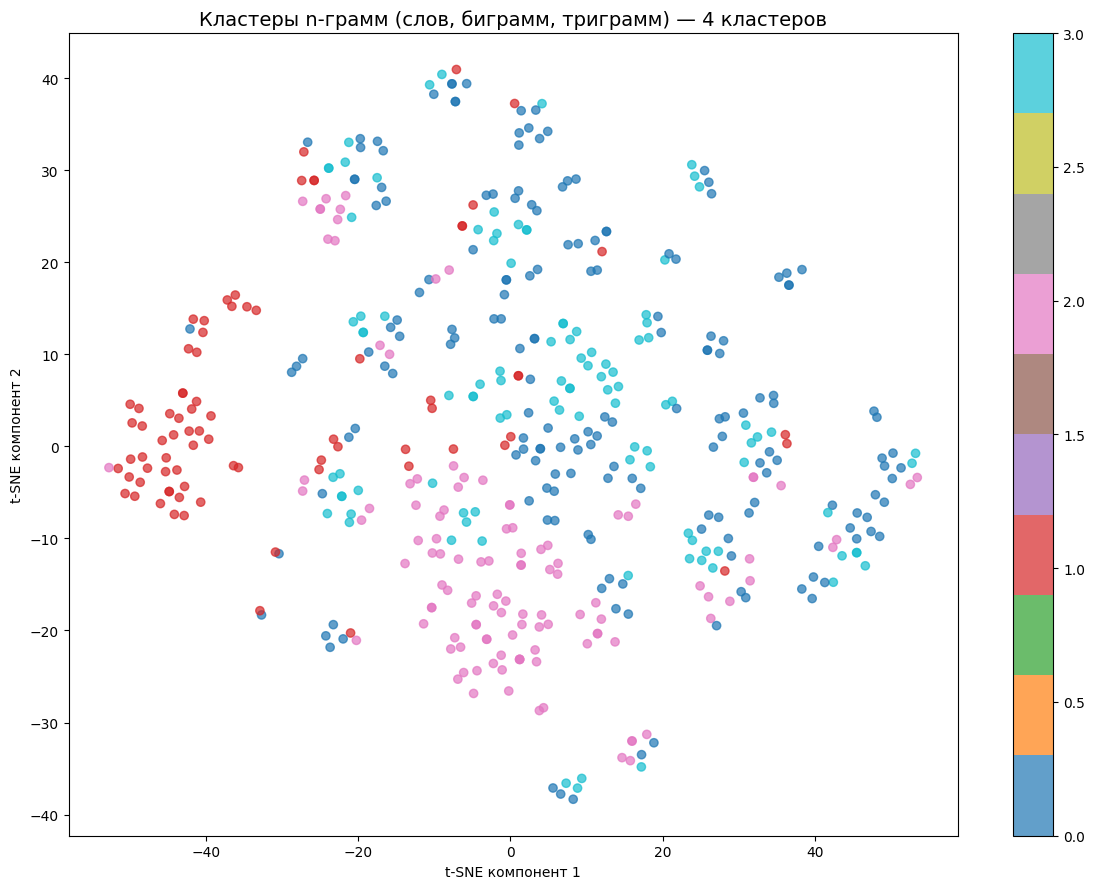


üîç –ü—Ä–∏–º–µ—Ä—ã n-–≥—Ä–∞–º–º –ø–æ –∫–ª–∞—Å—Ç–µ—Ä–∞–º (—Ç–æ–ø-5 –Ω–∞ –∫–ª–∞—Å—Ç–µ—Ä):

–ö–ª–∞—Å—Ç–µ—Ä 0:
  - –∞–ø–Ω–ø–∫ –∞–ª—Ä–ø–≥
  - –∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–∫ –∞–ª–Ω–±–∫
  - –∞–ª–Ω–±–∫ –∞–ª–Ω–±–∫ –ø–ø–±
  - –∞–ª–Ω–ª–∫ –∞–ª—Ä–ø–≥
  - –∞–ª–Ω–±–∫ –∞–ª–Ω–±–∫

–ö–ª–∞—Å—Ç–µ—Ä 1:
  - –ø–ø—É–¥–ø –∞–ø–Ω–±–∫ –ø–ø–±
  - –∞–ø–Ω—Ä–∫ –ø–ø–±
  - –ø–ø—É–¥ –∞–ª–Ω–±–∫ –ø–ø–±
  - –∫–∞–±—Ä –ø–ø–±
  - –ø–ø–± –∑–æ–Ω

–ö–ª–∞—Å—Ç–µ—Ä 2:
  - –∑–æ—Ç –∞–ª—Ä–±–≥ –ø–ø–±
  - –∞–ª–Ω–ø–∫ –∞–ª—Ä–±–≥
  - –∞–ø—Ä–±–≥ –ø–ø–±
  - –∞–ø—Ä–ø–∫ –∞–ª–Ω–±–∫ –∞–ø—Ä–±–≥
  - –∞–ª–Ω–±–∫ –∞–ø—Ä–±–≥

–ö–ª–∞—Å—Ç–µ—Ä 3:
  - –∞–ø—Ä–ø–≥ –∞–ø—Ä–ø–≥ –∞–ª–Ω–ø–≥
  - –∞–ø—Ä–ø–≥ –∞–ø–Ω–ø–∫ –∞–ø—Ä–±–≥
  - –∞–ª—Ä–ø–≥ –∞–ø—Ä–ø–≥ –∞–ø—Ä–ø–≥
  - –∞–ø—Ä–ø–≥ –∞–ª–Ω–ø–≥ –∞–ø–Ω–±–∫
  - –∞–ø—Ä–ø–≥ –∑–æ–Ω


In [261]:
if __name__ == "__main__":

    # –ó–∞–ø—É—Å–∫ –∫–ª–∞—Å—Ç–µ—Ä–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
    result_df, X, labels = cluster_ngrams(
        df_word,
        text_column='act',
        language='russian',
        include_unigrams=True,
        include_bigrams=True,
        include_trigrams=True,
        n_clusters=4,
        ngram_max_features=800
    )

In [263]:
    pip install --upgrade notebook

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14.3/14.3 MB 48.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.3/12.3 MB 40.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 59.7/59.7 kB 4.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76.7/76.7 kB 7.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: notebook
    Found existing installation: notebook 6.5.7
    Uninstalling notebook-6.5.7:
      Successfully uninstalled notebook-6.5.7
ERROR: pip's dependency resolver does not current

In [249]:
df_word

act
0                   –∞–ª–Ω–±–∫. –∞–ª—Ä–ø–≥
1                      –±–ª. –∞–ø—Ä–ø–∫
2     –∞–ø—Ä–±–≥. –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥
3                       –ø–ø–±. –∑–æ—Ç
4        –∞–ø–Ω–ø–∫, –∞–ø—Ä–ø–≥. –±–ª, –∞–ª–Ω–ª–∫
..                           ...
370                 –∞–ø—Ä–ø–≥. –∞–ø—Ä–ø–≥
371     –∞–ø—Ä–ø–≥,–∞–ª—Ä–ø–≥,–∞–ª–Ω–ø–∫. –∞–ø–Ω–±–∫
372       –∞–ø—Ä–ø–≥,–∞–ª–Ω–ø–∫,–∞–ª—Ä–±–≥. –∑–æ–Ω
373  –∞–ª—Ä–ø–≥,–∞–ª–Ω–±–∫,–∞–ø–Ω–ø–∫. –±–ª,–±–ª,–±–ª
374                     –∞–ø—Ä–ø–≥. -

[375 rows x 1 columns]

# simple DB

In [ ]:
import sqlite3

con = sqlite3.connect("absrb2022.db")
cur = con.cursor()

In [ ]:
df_act.to_sql("actions", con=con, if_exists="append", index=False)

375

In [ ]:
df_spr.to_sql("guide", con=con, if_exists="append", index=False)

30

In [ ]:
df_par.to_sql("participants", con=con, if_exists="append", index=False)

40

In [ ]:
pd.read_sql('''
    SELECT *
    FROM actions
''', con)

fighter1   fighter2          stage         start_ep           end_ep  \
0    ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:47:00.000000  04:48:00.000000   
1    ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:31:00.000000  04:30:00.000000   
2    ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:28:00.000000  04:26:00.000000   
3    ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:26:00.000000  04:25:00.000000   
4    ilkvl0198  karma0692  —á–µ—Ç–≤–µ—Ä—Ç—å—Ñ–∏–Ω–∞–ª  04:12:00.000000  04:10:00.000000   
..         ...        ...            ...              ...              ...   
370  nizul0198  fedni0301          —Ñ–∏–Ω–∞–ª  02:37:00.000000  02:33:00.000000   
371  nizul0198  fedni0301          —Ñ–∏–Ω–∞–ª  02:32:00.000000  02:28:00.000000   
372  nizul0198  fedni0301          —Ñ–∏–Ω–∞–ª  02:24:00.000000  02:21:00.000000   
373  nizul0198  fedni0301          —Ñ–∏–Ω–∞–ª  02:20:00.000000  02:17:00.000000   
374  nizul0198  fedni0301          —Ñ–∏–Ω–∞–ª  02:16:00.000000  02:14:00.000000   

     attacker          actions_1            actions_2 results_1 results_2  
0           1              –∞–ª–Ω–±–∫                –∞–ª—Ä–ø–≥         1         0  
1           2                 –±–ª                –∞–ø—Ä–ø–∫         0         0  
2           2              –∞–ø—Ä–±–≥  –∞–ø—Ä–ø–≥, –∞–ø—Ä–ø–≥, –∞–ª—Ä–ø–≥         1     1,0,0  
3           1                –ø–ø–±                  –∑–æ—Ç         –ê         0  
4           1       –∞–ø–Ω–ø–∫, –∞–ø—Ä–ø–≥            –±–ª, –∞–ª–Ω–ª–∫         0         0  
..        ...                ...                  ...       ...       ...  
370         1              –∞–ø—Ä–ø–≥                –∞–ø—Ä–ø–≥         1         0  
371         1  –∞–ø—Ä–ø–≥,–∞–ª—Ä–ø–≥,–∞–ª–Ω–ø–∫                –∞–ø–Ω–±–∫     1,0,1         1  
372         1  –∞–ø—Ä–ø–≥,–∞–ª–Ω–ø–∫,–∞–ª—Ä–±–≥                  –∑–æ–Ω     1,1,0         0  
373         1  –∞–ª—Ä–ø–≥,–∞–ª–Ω–±–∫,–∞–ø–Ω–ø–∫             –±–ª,–±–ª,–±–ª     0,0,0     0,0,0  
374         1              –∞–ø—Ä–ø–≥                    -         1         0  

[375 rows x 10 columns]

In [ ]:
pd.read_sql('''
    SELECT *
    FROM participants
''', con)

id                  nation  place  weight_over_73  \
0   gusil0194                  Russia      1               0   
1   makda0401                  Russia      2               0   
2   khias0501              Uzbekistan      3               0   
3   dravl0587                 Belarus      3               0   
4   ilkvl0198                 Belarus      5               0   
5   musam0499         Kyrgyz Republic      5               0   
6   husah0390                 Lebanon      7               0   
7   ergim0795              Uzbekistan      7               0   
8   elahm0900                   Syria      9               0   
9   racul0297         Kyrgyz Republic      9               0   
10  hasze1297  Republic South Ossetia     11               0   
11  makzo1004              Tajikistan     11               0   
12  bekan0395              Kazakhstan     13               0   
13  karma0692  Republic South Ossetia     13               0   
14  hotna0102             Afghanistan     15               0   
15  bastu1202              Azerbaijan     15               0   
16  valel0102                 Georgia     15               0   
17  bilmu0995                Pakistan     15               0   
18  alcyo0493                   Egypt     19               0   
19  himpr0903                   India     19               0   
20  nizul0198              Uzbekistan      1               1   
21  fedni0301                  Russia      2               1   
22  maggi0295                  Russia      3               1   
23  kamil1296              Uzbekistan      3               1   
24  sabza0698  Republic South Ossetia      5               1   
25  kozro0598  Republic South Ossetia      5               1   
26  barmo0898             Afghanistan      7               1   
27  paiuu0497         Kyrgyz Republic      7               1   
28  ataba1295            Turkmenistan      9               1   
29  orosa0690         Kyrgyz Republic      9               1   
30  gauro0181                 Germany     11               1   
31  nasbe0689              Kazakhstan     11               1   
32  lapiv0996                 Belarus     13               1   
33  abeal0389                  Jordan     13               1   
34  manab0499                  Jordan     15               1   
35  dubal0385                 Belarus     15               1   
36  qasel1193              Azerbaijan     15               1   
37  alish0185                Pakistan     15               1   
38  razre1197                    Iran     19               1   
39  phoch0288                Thailand     19               1   

              birthdate  
0   1994-01-21 00:00:00  
1   2001-04-03 00:00:00  
2   2001-05-16 00:00:00  
3   1987-05-26 00:00:00  
4   1998-01-23 00:00:00  
5   1999-04-01 00:00:00  
6   1990-03-23 00:00:00  
7   1995-07-07 00:00:00  
8   2000-09-23 00:00:00  
9   1997-02-26 00:00:00  
10  1997-12-06 00:00:00  
11  2004-10-15 00:00:00  
12  1995-03-08 00:00:00  
13  1992-06-19 00:00:00  
14  2002-01-20 00:00:00  
15  2002-12-13 00:00:00  
16  2002-01-05 00:00:00  
17  1995-09-07 00:00:00  
18  1993-04-28 00:00:00  
19  2003-09-23 00:00:00  
20  1998-01-19 00:00:00  
21  2001-03-25 00:00:00  
22  1995-02-20 00:00:00  
23  1996-12-12 00:00:00  
24  1998-06-14 00:00:00  
25  1998-05-10 00:00:00  
26  1998-08-12 00:00:00  
27  1997-04-22 00:00:00  
28  1995-12-24 00:00:00  
29  1990-06-12 00:00:00  
30  1981-01-01 00:00:00  
31  1989-06-29 00:00:00  
32  1996-09-12 00:00:00  
33  1989-03-27 00:00:00  
34  1999-04-21 00:00:00  
35  1985-03-25 00:00:00  
36  1993-11-18 00:00:00  
37  1985-01-08 00:00:00  
38  1997-11-05 00:00:00  
39  1988-02-07 00:00:00

In [ ]:
pd.read_sql('''
    SELECT *
    FROM guide
''', con)

action abbreviation                                       description
0    –∞—Ç–∞–∫–∞        –∞–ª—Ä–ø–≥    –∞—Ç–∞–∫–∞ –ª–µ–≤–æ–π —Ä—É–∫–æ–π –ø—Ä—è–º–æ–π —É–¥–∞—Ä –≤ –æ–±–ª–∞—Å—Ç—å –≥–æ–ª–æ–≤—ã
1    –∞—Ç–∞–∫–∞        –∞–ø—Ä–ø–≥   –∞—Ç–∞–∫–∞ –ø—Ä–∞–≤–æ–π —Ä—É–∫–æ–π –ø—Ä—è–º–æ–π —É–¥–∞—Ä –≤ –æ–±–ª–∞—Å—Ç—å –≥–æ–ª–æ–≤—ã
2    –∞—Ç–∞–∫–∞        –∞–ª–Ω–±–∫         –∞—Ç–∞–∫–∞ –ª–µ–≤–æ–π –Ω–æ–≥–æ–π –±–æ–∫–æ–≤–æ–π —É–¥–∞—Ä –≤ —Ç—É–ª–æ–≤–∏—â–µ
3    –∞—Ç–∞–∫–∞        –∞–ø–Ω–±–∫        –∞—Ç–∞–∫–∞ –ø—Ä–∞–≤–æ–π –Ω–æ–≥–æ–π –±–æ–∫–æ–≤–æ–π —É–¥–∞—Ä –≤ —Ç—É–ª–æ–≤–∏—â–µ
4    –∞—Ç–∞–∫–∞        –∞–ª—Ä–±–≥   –∞—Ç–∞–∫–∞ –ª–µ–≤–æ–π —Ä—É–∫–æ–π –±–æ–∫–æ–≤–æ–π —É–¥–∞—Ä –≤ –æ–±–ª–∞—Å—Ç—å –≥–æ–ª–æ–≤—ã
5    –∞—Ç–∞–∫–∞        –∞–ø—Ä–±–∫  –∞—Ç–∞–∫–∞ –ø—Ä–∞–≤–æ–π —Ä—É–∫–æ–π –±–æ–∫–æ–≤–æ–π —É–¥–∞—Ä –≤ –æ–±–ª–∞—Å—Ç—å –≥–æ–ª–æ–≤—ã
6    –∞—Ç–∞–∫–∞        –∞–ª–Ω–ø–∫         –∞—Ç–∞–∫–∞ –ª–µ–≤–æ–π –Ω–æ–≥–æ–π –±–æ–∫–æ–≤–æ–π —É–¥–∞—Ä –≤ —Ç—É–ª–æ–≤–∏—â–µ
7    –∞—Ç–∞–∫–∞        –∞–ø–Ω–ø–∫         –∞—Ç–∞–∫–∞ –ø—Ä–∞–≤–æ–π –Ω–æ–≥–æ–π –ø—Ä—è–º–æ–π —É–¥–∞—Ä –≤ —Ç—É–ª–æ–≤–∏—â–µ
8    –∞—Ç–∞–∫–∞          –ø–ø–±                        –ø–æ–ø—ã—Ç–∫–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –±—Ä–æ—Å–∫–∞ 
9    –∞—Ç–∞–∫–∞        –∞–ª–Ω–ª–∫               –∞—Ç–∞–∫–∞ –ª–µ–≤–æ–π –Ω–æ–≥–æ–π –ø–æ –Ω–æ–≥–µ (–ª–æ—É –∫–∏–∫)
10   –∞—Ç–∞–∫–∞         –ø–ø—É–¥                      –ø–æ–ø—ã—Ç–∫–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è —É–¥–µ—Ä–∂–∞–Ω–∏—è
11   –∞—Ç–∞–∫–∞       –ø–ø—É–¥–ø—Ä              –ø–æ–ø—ã—Ç–∫–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è —É–¥—É—à–∞—é—â–µ–≥–æ –ø—Ä–∏–µ–º–∞
12   –∞—Ç–∞–∫–∞        –∞–ª—Ä—Å–≥          –∞—Ç–∞–∫–∞ –ª–µ–≤–æ–π —Ä—É–∫–æ–π —Å–Ω–∏–∑—É –≤ –æ–±–ª–∞—Å—Ç—å –≥–æ–ª–æ–≤—ã
13   –∞—Ç–∞–∫–∞        –∞–ø—Ä—Å–≥         –∞—Ç–∞–∫–∞ –ø—Ä–∞–≤–æ–π —Ä—É–∫–æ–π —Å–Ω–∏–∑—É –≤ –æ–±–ª–∞—Å—Ç—å –≥–æ–ª–æ–≤—ã
14   –∞—Ç–∞–∫–∞        –∞–ø—Ä—Ä–≥          –∞—Ç–∞–∫–∞ –ø—Ä–∞–≤–æ–π —Ä—É–∫–æ–π —Å —Ä–∞–∑–≤–æ—Ä–æ—Ç–æ–º –≤ –≥–æ–ª–æ–≤—É
15   –∞—Ç–∞–∫–∞        –∞–ø–Ω—Ä–∫        –∞—Ç–∞–∫–∞ –ø—Ä–∞–≤–æ–π –Ω–æ–≥–æ–π —Å —Ä–∞–∑–≤–æ—Ä–æ—Ç–æ–º –≤ —Ç—É–ª–æ–≤–∏—â–µ
16  –∑–∞—â–∏—Ç–∞          –∑–æ–Ω                              –∑–∞—â–∏—Ç–∞ –æ—Ç—Ö–æ–¥–æ–º –Ω–∞–∑–∞–¥
17  –∑–∞—â–∏—Ç–∞           –±–ª                                –±–ª–æ–∫–∏—Ä–æ–≤–∞–Ω–∏–µ –∞—Ç–∞–∫–∏
18  –∑–∞—â–∏—Ç–∞          –∑–æ—Ç                                   –∑–∞—â–∏—Ç–∞ –æ—Ç–∫–ª–æ–Ω–æ–º
19  –∑–∞—â–∏—Ç–∞         –∫–∞–±—Ä                                –∫–æ–Ω—Ç—Ä–∞—Ç–∞–∫–∞ –±—Ä–æ—Å–∫–æ–º
20  –∑–∞—â–∏—Ç–∞          —É–∫–ª                                    –∑–∞—â–∏—Ç–∞ —É–∫–ª–æ–Ω–æ–º
21  –∑–∞—â–∏—Ç–∞          –Ω—ã—Ä                                     –∑–∞—â–∏—Ç–∞ –Ω—ã—Ä–∫–æ–º
22  –∑–∞—â–∏—Ç–∞         —É—Ö—É–¥                                 —É—Ö–æ–¥ –æ—Ç —É–¥–µ—Ä–∂–∞–Ω–∏—è
23  –æ—Ü–µ–Ω–∫–∞            1                                            1 –±–∞–ª–ª
24  –æ—Ü–µ–Ω–∫–∞            2                                           2 –±–∞–ª–ª–∞
25  –æ—Ü–µ–Ω–∫–∞            –ê                                        –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å
26  –æ—Ü–µ–Ω–∫–∞           –≠–§               —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π —É–¥—É—à–∞—é—â–∏–π/–±–æ–ª–µ–≤–æ–π –ø—Ä–∏–µ–º
27  –æ—Ü–µ–Ω–∫–∞         –ù–ï–≠–§             –Ω–µ—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π —É–¥—É—à–∞—é—â–∏–π/–±–æ–ª–µ–≤–æ–π –ø—Ä–∏–µ–º
28  –æ—Ü–µ–Ω–∫–∞          –ù–ö–î                                           –Ω–æ–∫–¥–∞—É–Ω
29  –æ—Ü–µ–Ω–∫–∞           –ù–ö                                            –Ω–æ–∫–∞—É—Ç

In [ ]:
with con:
    cur.execute("""
        CREATE TABLE participants (
            id INT NOT NULL PRIMARY KEY,
            name TEXT,
            nation TEXT,
            place INTEGER,
            weight_over_73 INTEGER,
            birthdate DATE
        );
    """)

OperationalError: table participants already exists

In [ ]:
with con:
    cur.execute ("""
        CREATE TABLE actions1 (
            fighter1 TEXT,
            fighter2 TEXT,
            stage INT,
            start_ep TIME,
            end_ep TIME,
            attacker INT,
            actions_1 TEXT,
            actions_2 TEXT,
            results_1 TEXT,
            results_2 TEXT,

            PRIMARY KEY(fighter1, fighter2),
            FOREIGN KEY(fighter1) REFERENCES participants(id),
            FOREIGN KEY(fighter2) REFERENCES participants(id)
        );
    """)

In [ ]:
df_act.to_sql("actions1", con=con, if_exists="append", index=False)